<a href="https://colab.research.google.com/github/Rochakr4/CAPSTONE-PROJECT-3--Cardiovascular-Risk-Prediction/blob/main/CAPSTONE_PROJECT_3_Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CAPSTONE PROJECT 3- Cardiovascular Risk Prediction**

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.

# **Data Description**

Demographic:

• Sex: male or female("M" or "F")

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous) Behavioral

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history)

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous) Predict variable (desired target)

• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -DV

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
import warnings
from sklearn.feature_selection import chi2
from scipy.stats import chi2, chi2_contingency, f_oneway
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, recall_score, precision_score,\
 accuracy_score, roc_curve, auc, classification_report, confusion_matrix
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras import Sequential, layers
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#Reading the dataset
data_df=pd.read_csv('/content/drive/MyDrive/CAPSTONE PROJECT 3- Cardiovascular Risk Prediction/data_cardiovascular_risk.csv',encoding = 'unicode_escape')

In [6]:
data_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [8]:
data_df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [9]:
data_df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [10]:
cat_features = ['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
num_features = ['age', 'totChol', 'cigsPerDay', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

In [11]:
simp_imputer = SimpleImputer(strategy="most_frequent")
simp_imputer.fit(data_df[cat_features])
data_df[cat_features]= simp_imputer.transform(data_df[cat_features])

In [12]:
knn_imputer= KNNImputer(n_neighbors=5)
knn_imputer.fit(data_df[num_features])
data_df[num_features]= knn_imputer.transform(data_df[num_features])

In [13]:
data_df.groupby('TenYearCHD')['id'].count()

TenYearCHD
0    2879
1     511
Name: id, dtype: int64

In [14]:
data_df['sex']=np.where(data_df['sex']=='M',1,0)
data_df['is_smoking']=np.where(data_df['is_smoking']=='YES',1,0)

# Exploratory Data Analysis



# Education

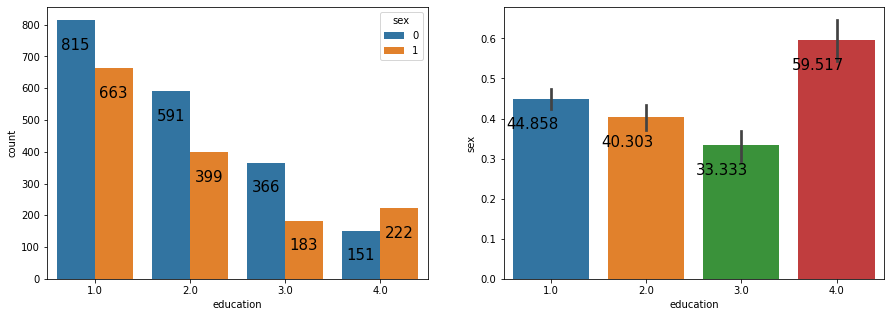

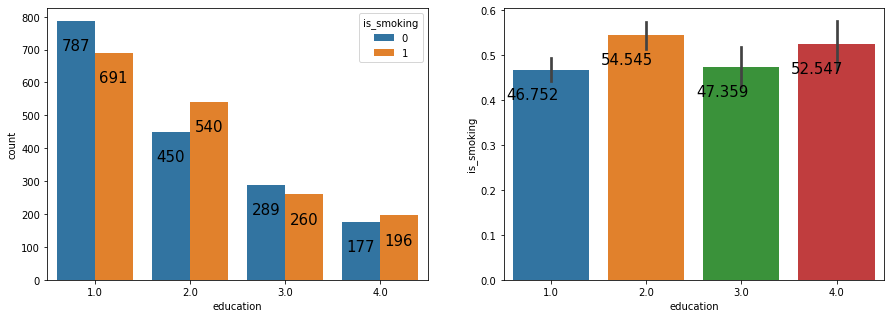

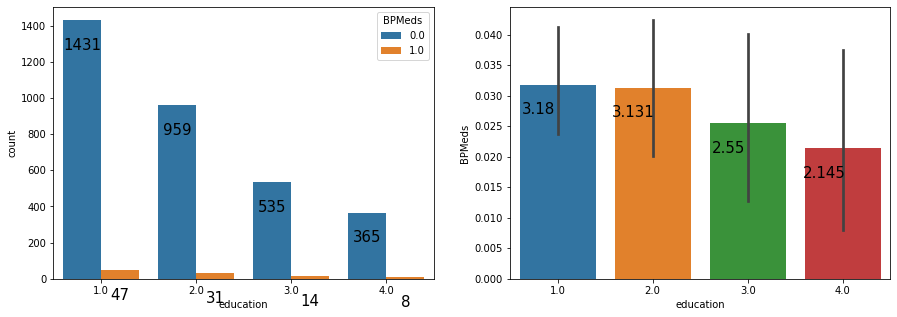

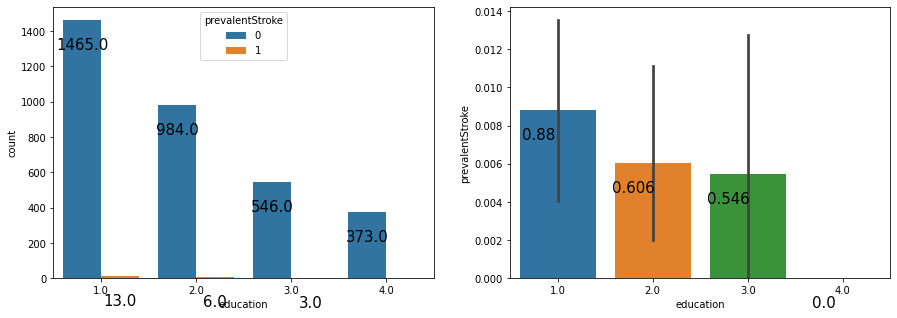

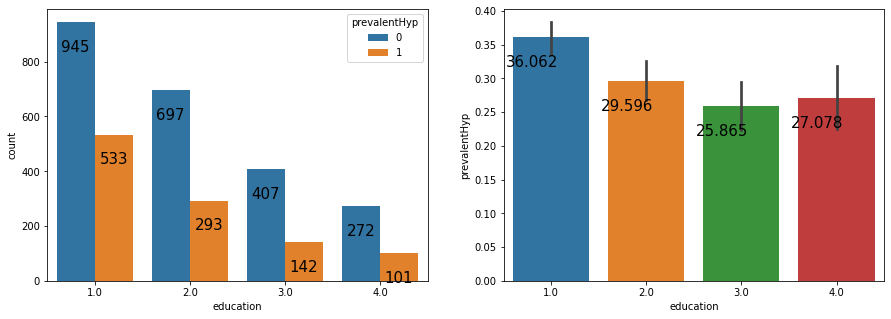

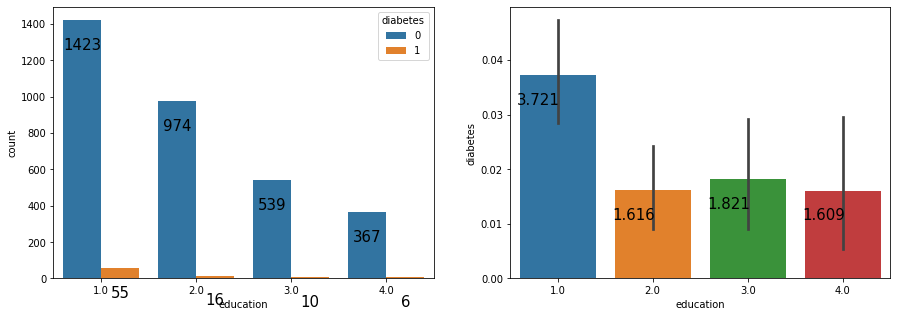

In [15]:

for v in ['sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
  fig, axes = plt.subplots(1,2,figsize=(15,5))
  ch=sns.countplot(x='education',hue=v,data=data_df, ax=axes[0])
  for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
  vh=sns.barplot('education',v, data = data_df, ax=axes[1])
  for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

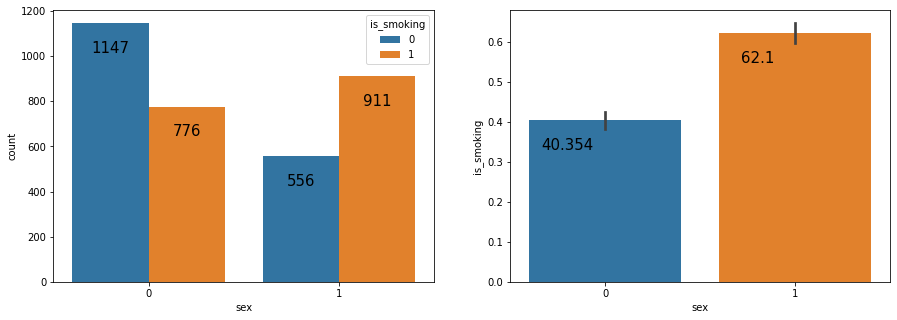

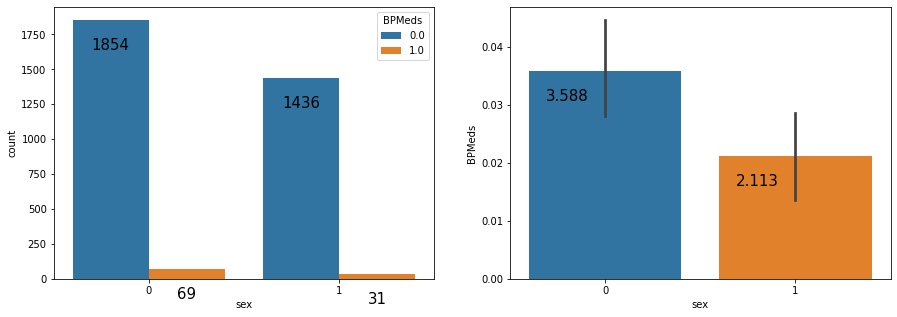

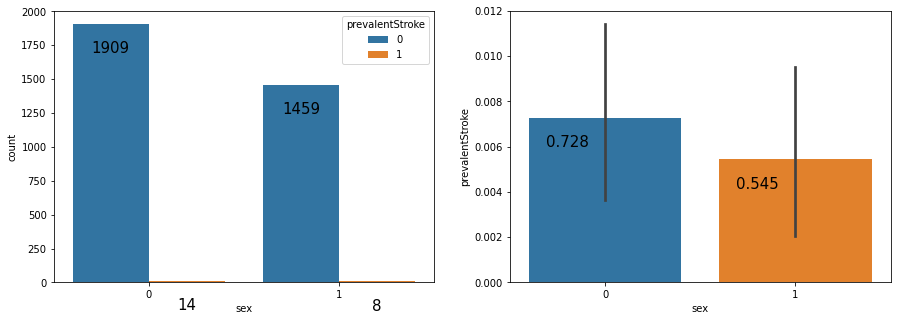

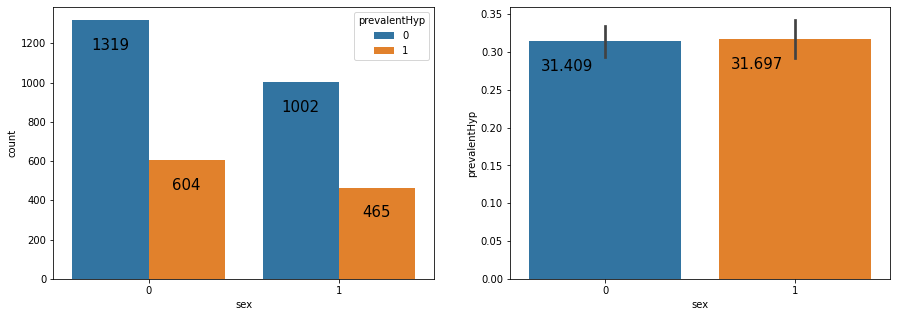

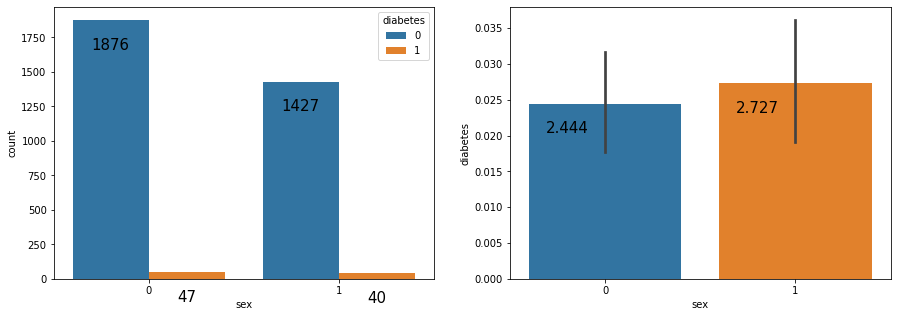

In [16]:
for v in ['is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
  fig, axes = plt.subplots(1,2,figsize=(15,5))
  ch=sns.countplot(x='sex',hue=v,data=data_df, ax=axes[0])
  for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
  vh=sns.barplot('sex',v, data = data_df, ax=axes[1])
  for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

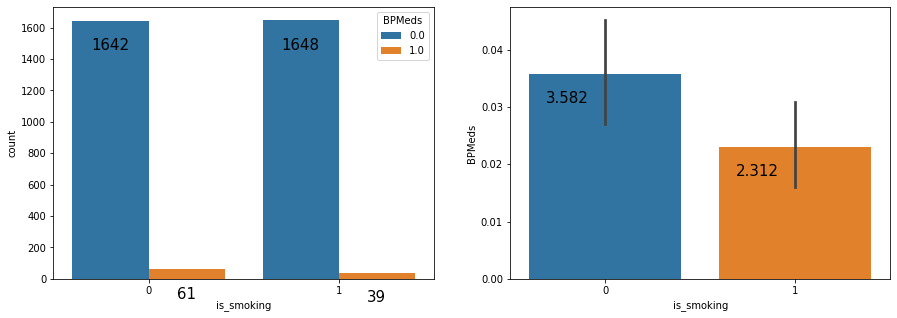

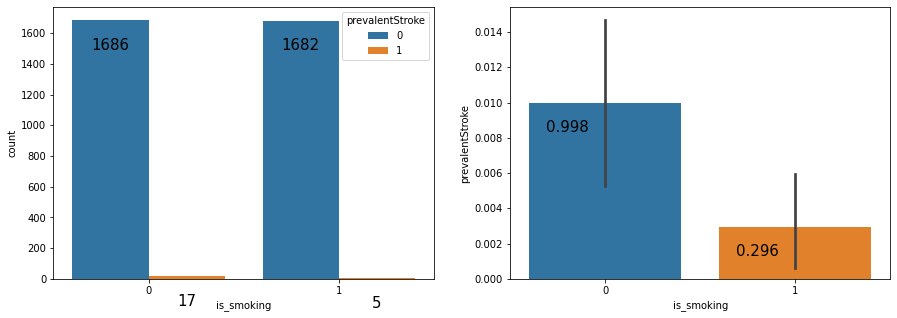

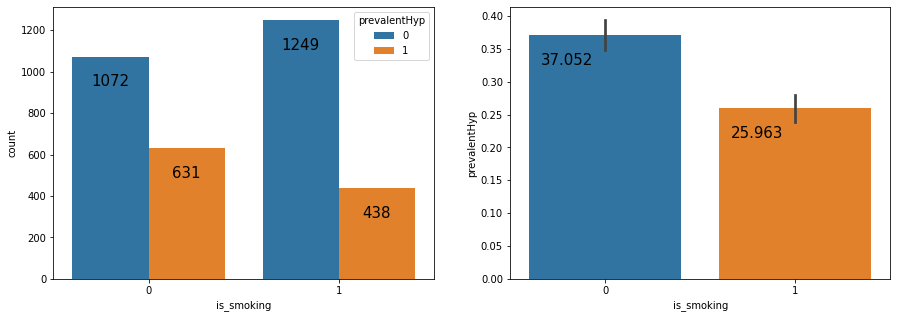

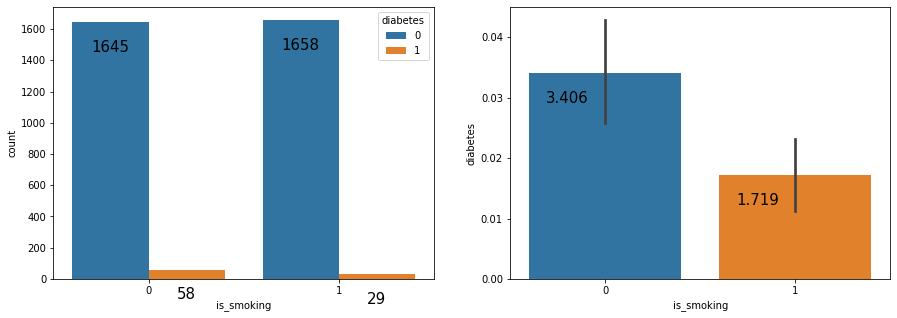

In [17]:
for v in ['BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
  fig, axes = plt.subplots(1,2,figsize=(15,5))
  ch=sns.countplot(x='is_smoking',hue=v,data=data_df, ax=axes[0])
  for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
  vh=sns.barplot('is_smoking',v, data = data_df, ax=axes[1])
  for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

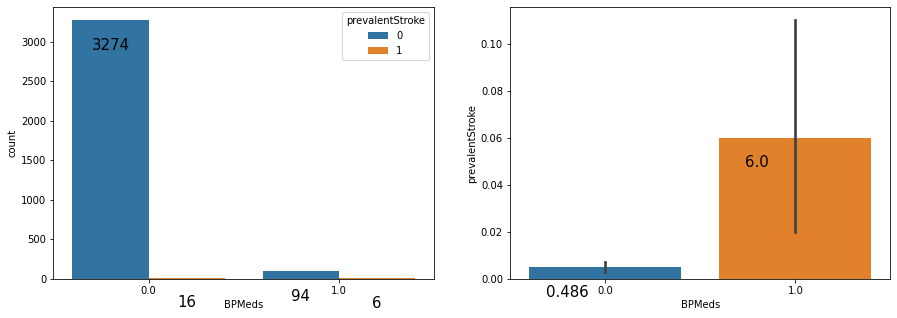

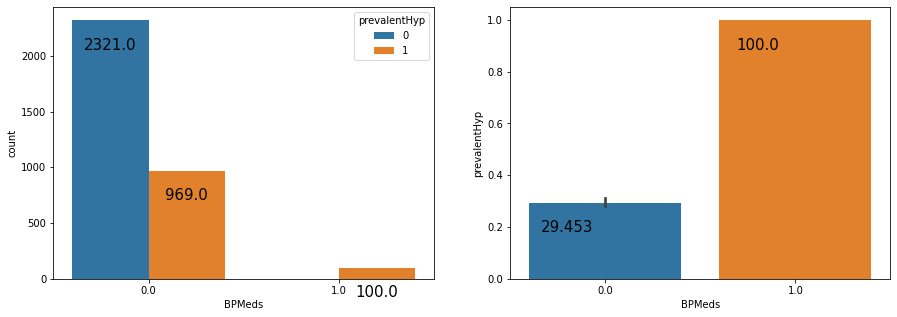

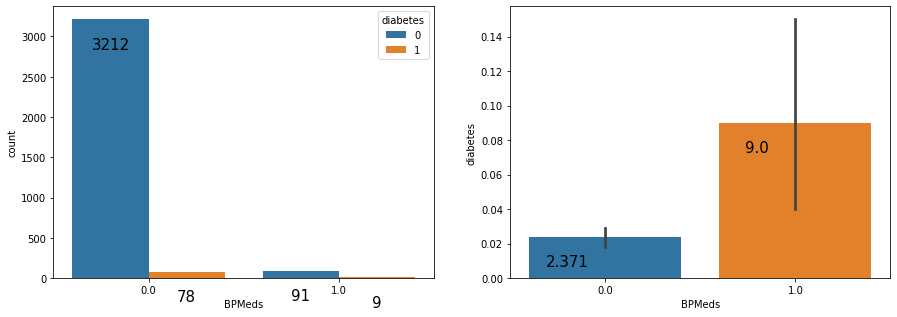

In [18]:
for v in ['prevalentStroke', 'prevalentHyp', 'diabetes']:
  fig, axes = plt.subplots(1,2,figsize=(15,5))
  ch=sns.countplot(x='BPMeds',hue=v,data=data_df, ax=axes[0])
  for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
  vh=sns.barplot('BPMeds',v, data = data_df, ax=axes[1])
  for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

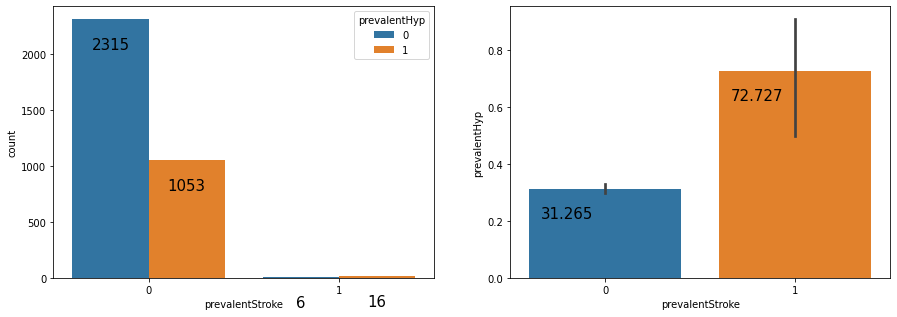

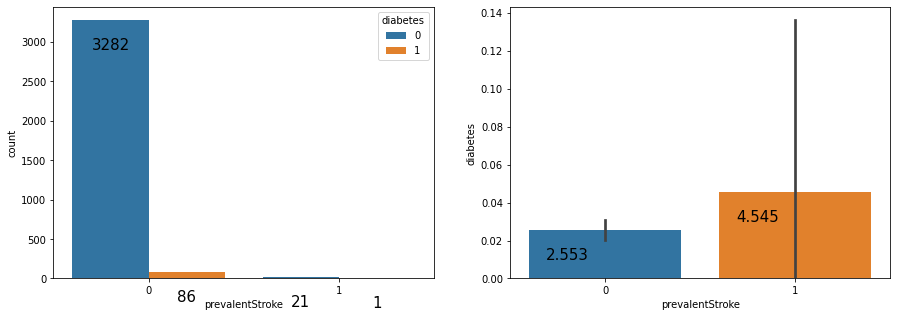

In [19]:
for v in ['prevalentHyp', 'diabetes']:
  fig, axes = plt.subplots(1,2,figsize=(15,5))
  ch=sns.countplot(x='prevalentStroke',hue=v,data=data_df, ax=axes[0])
  for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
  vh=sns.barplot('prevalentStroke',v, data = data_df, ax=axes[1])
  for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

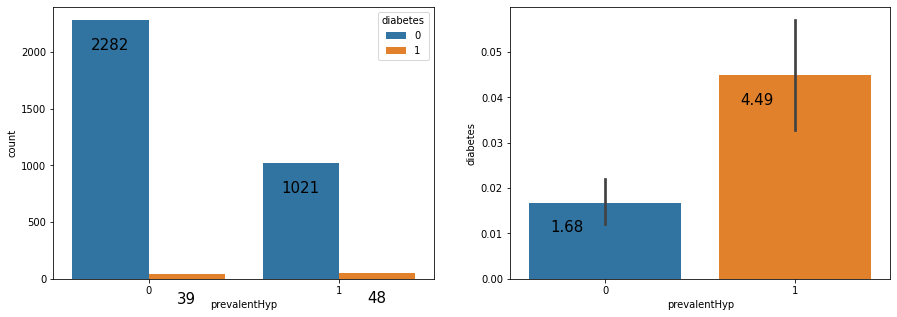

In [20]:
for v in ['diabetes']:
  fig, axes = plt.subplots(1,2,figsize=(15,5))
  ch=sns.countplot(x='prevalentHyp',hue=v,data=data_df, ax=axes[0])
  for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
  vh=sns.barplot('prevalentHyp',v, data = data_df, ax=axes[1])
  for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

# Categorical features with respect to target feature

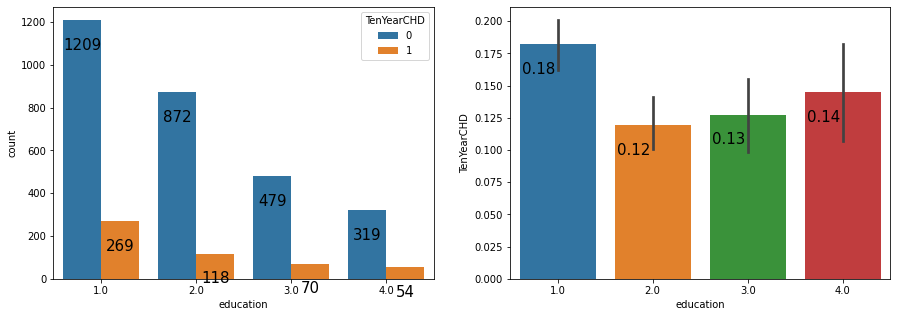

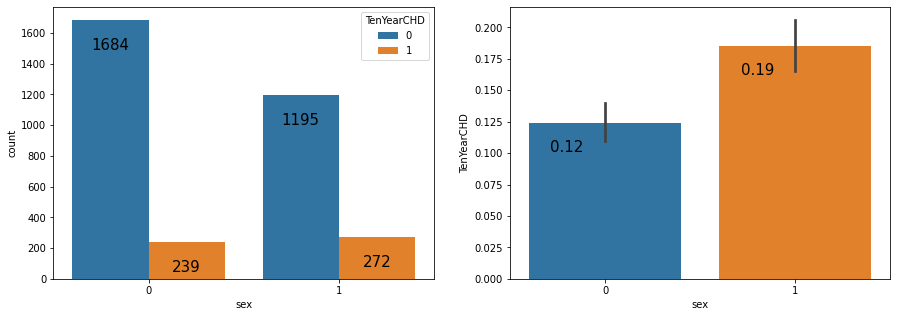

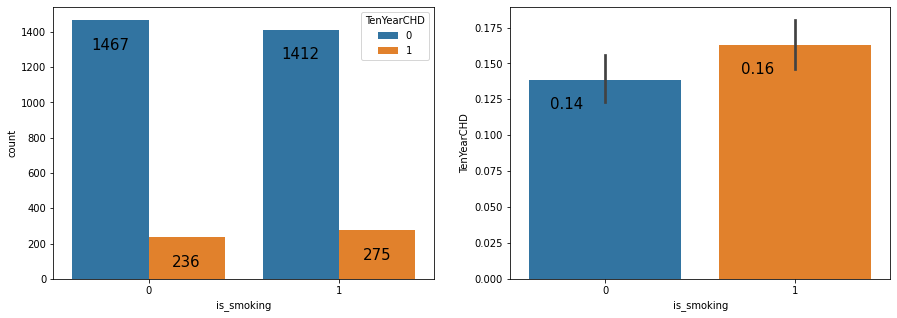

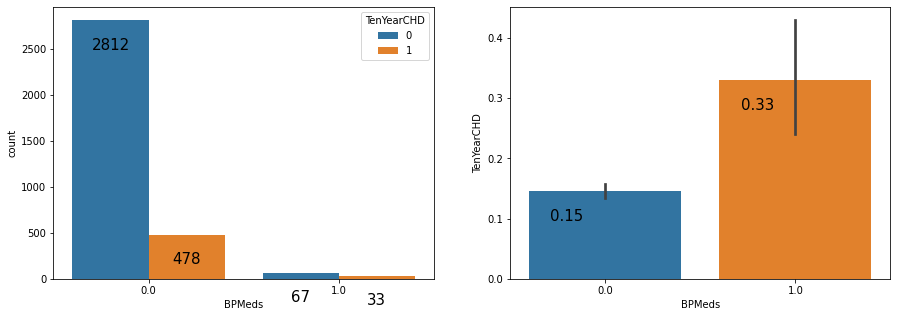

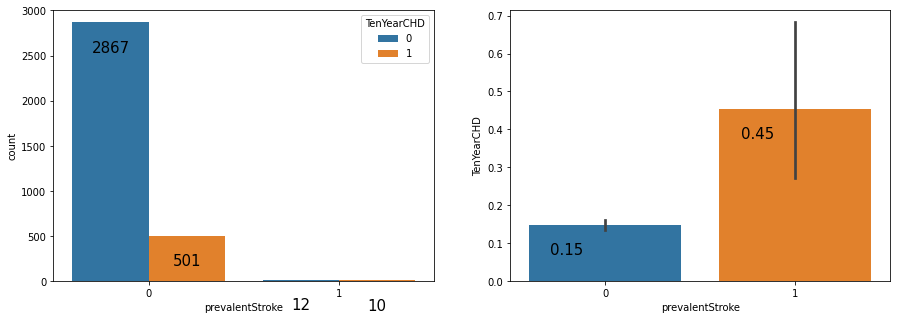

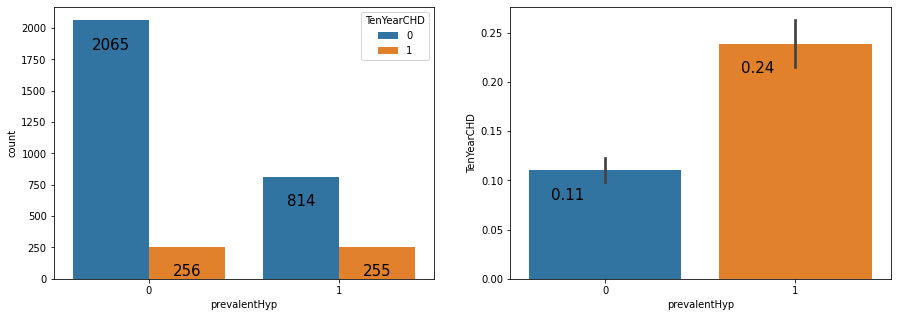

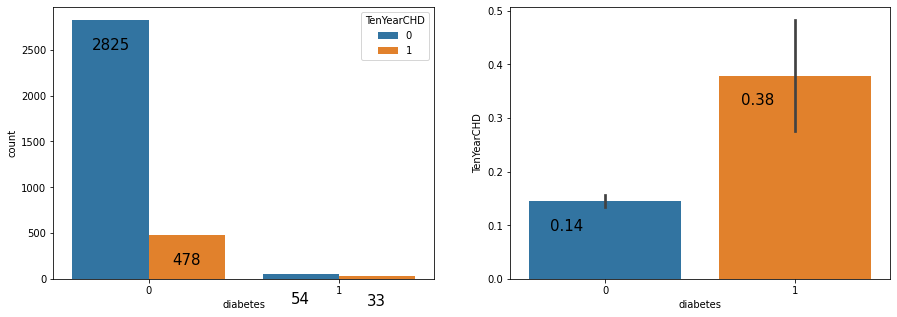

In [21]:
for v in cat_features:
   fig, axes = plt.subplots(1,2,figsize=(15,5))
   ch=sns.countplot(x=v,hue='TenYearCHD',data=data_df, ax=axes[0])
   for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
   vh=sns.barplot(v, 'TenYearCHD', data = data_df, ax=axes[1])
   for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height(),2)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

# Numerical features

**Analysis with respect to age**

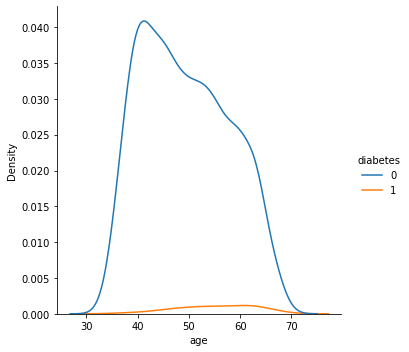

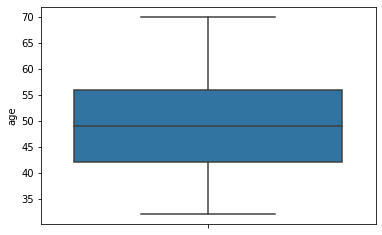

In [22]:

sns.displot(data=data_df, x='age', hue='diabetes', kind="kde")
plt.show()
sns.boxplot(data=data_df,y='age')
plt.show()

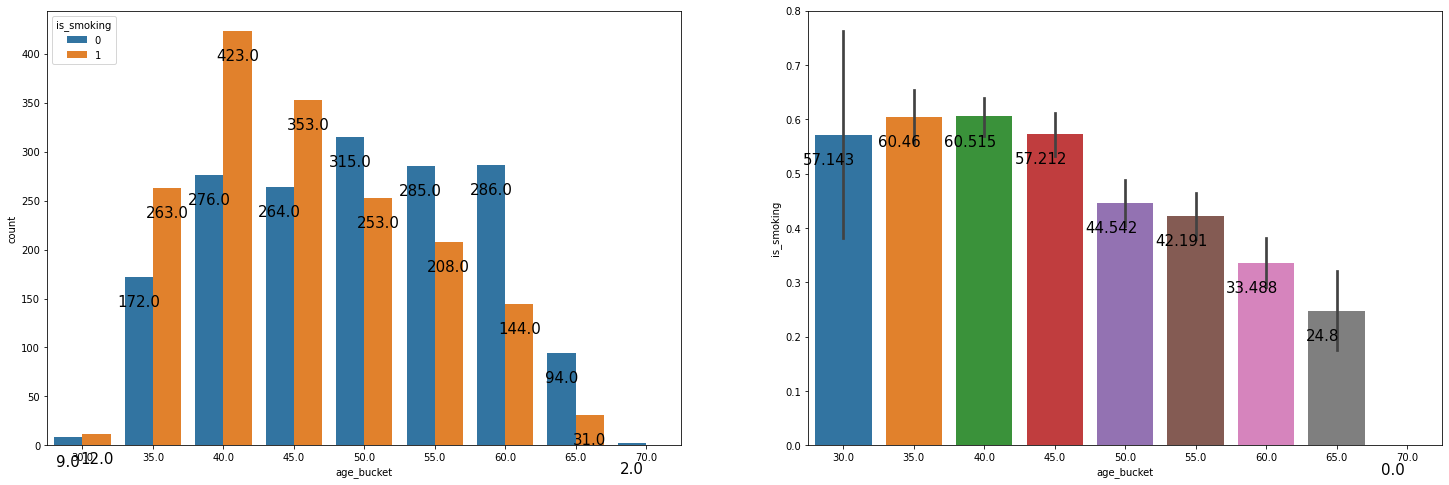

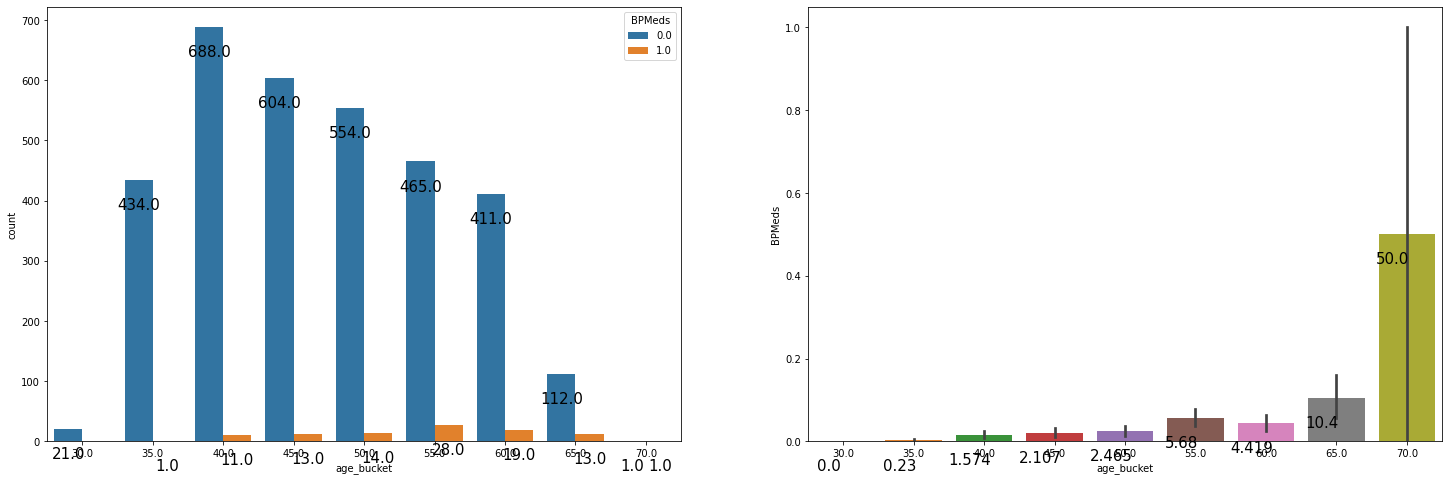

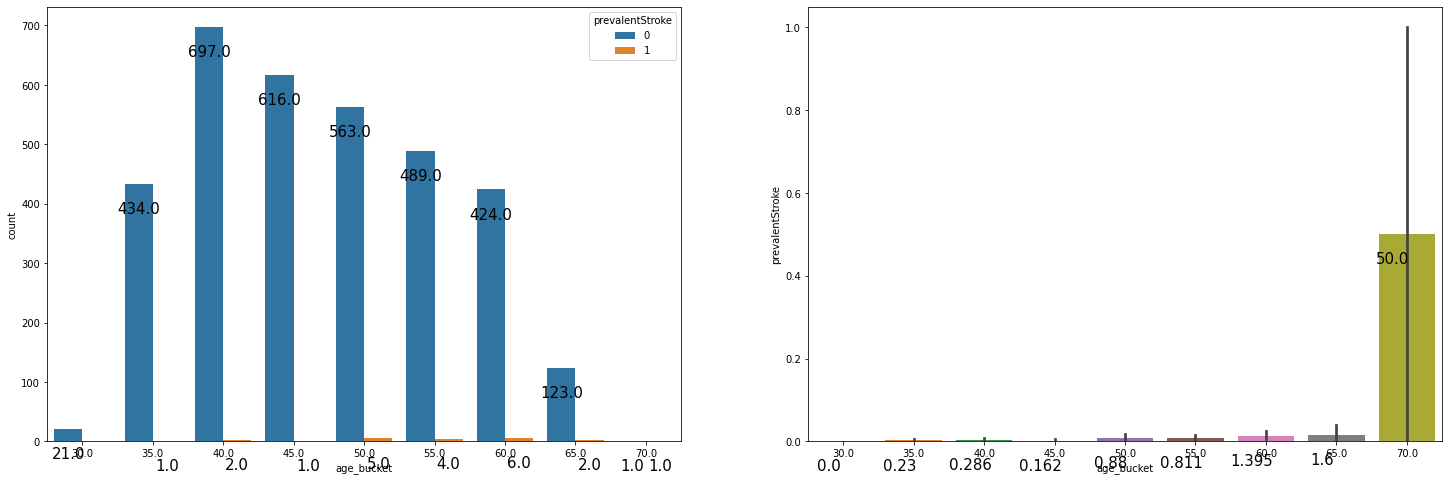

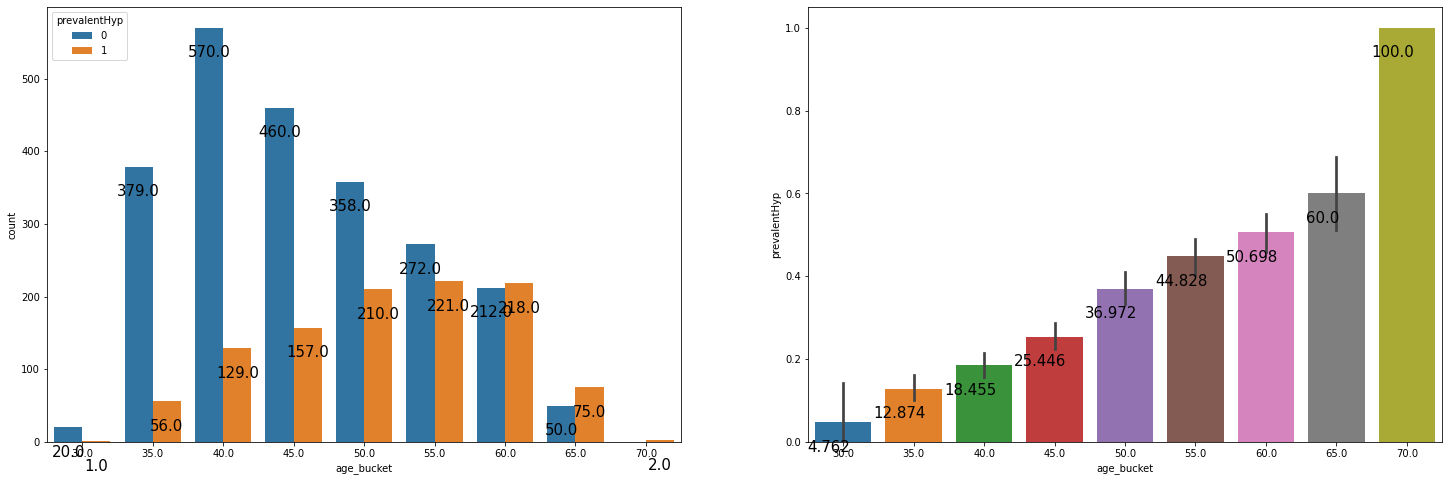

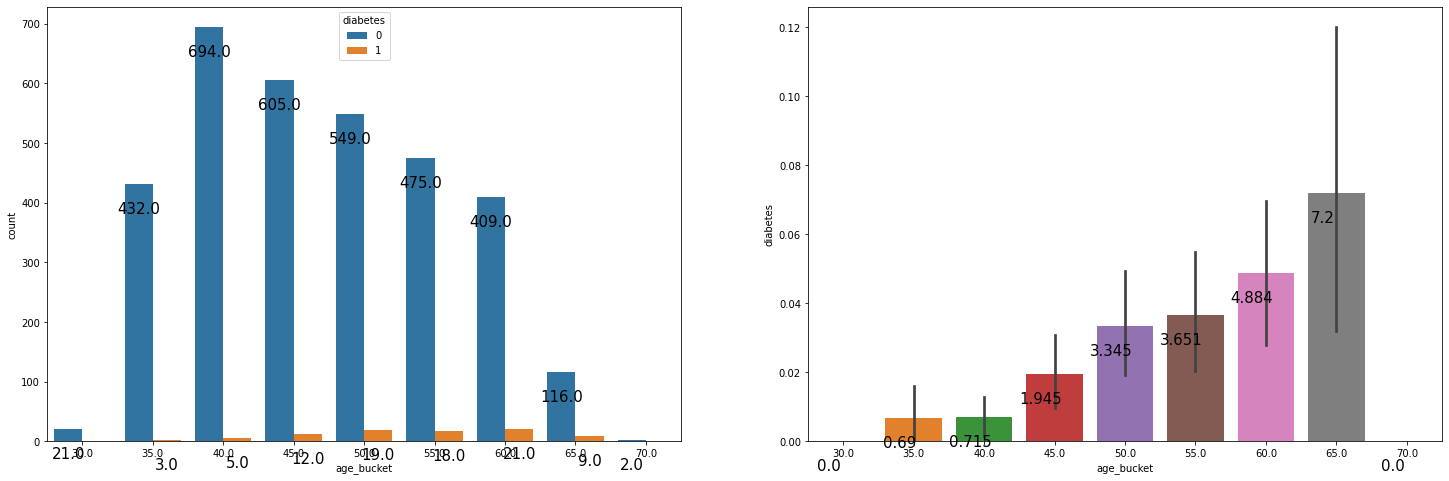

In [23]:
data_df['age_bucket'] = data_df['age'].apply(lambda x : 5*(x//5))
for v in ['is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
  fig, axes = plt.subplots(1,2,figsize=(25,8))
  ch=sns.countplot(x='age_bucket',hue=v,data=data_df, ax=axes[0])
  for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
  vh=sns.barplot('age_bucket',v, data = data_df, ax=axes[1])
  for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

**Analysis with respect to totChol**

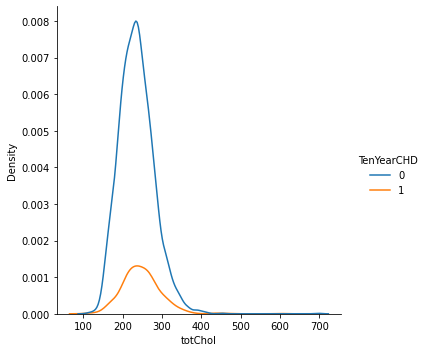

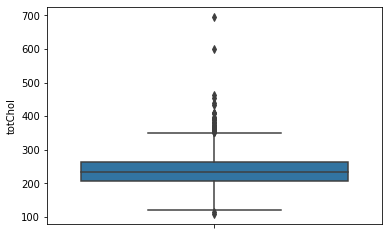

In [24]:
sns.displot(data=data_df, x='totChol', hue='TenYearCHD', kind="kde")
plt.show()
sns.boxplot(data=data_df,y='totChol')
plt.show()

In [25]:
vals = data_df.totChol.quantile([0.25,0.75])
print(vals)
iqr = vals.values[1] - vals.values[0]
min_lim, max_lim = vals.values[0] - 1.5*iqr, vals.values[1] + 1.5*iqr
data_df['totChol'] = data_df['totChol'].apply(lambda x : min_lim if x < min_lim else x)
data_df['totChol'] = data_df['totChol'].apply(lambda x : max_lim if x > max_lim else x)

0.25    206.0
0.75    264.0
Name: totChol, dtype: float64


In [26]:
(max(data_df['totChol'])-min(data_df['totChol']))/10

23.2

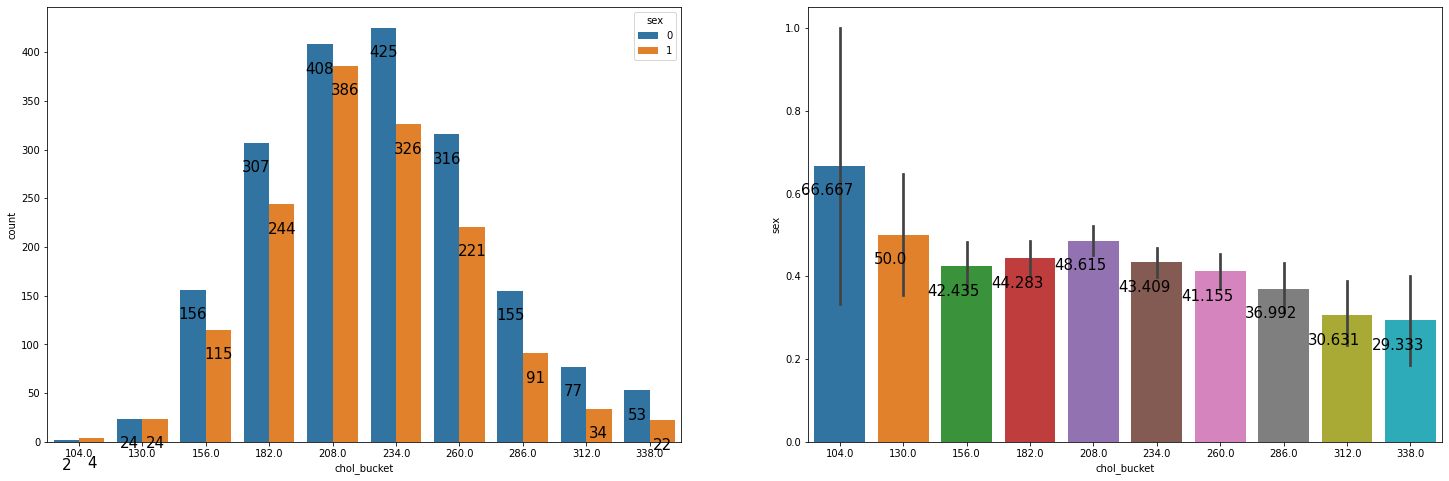

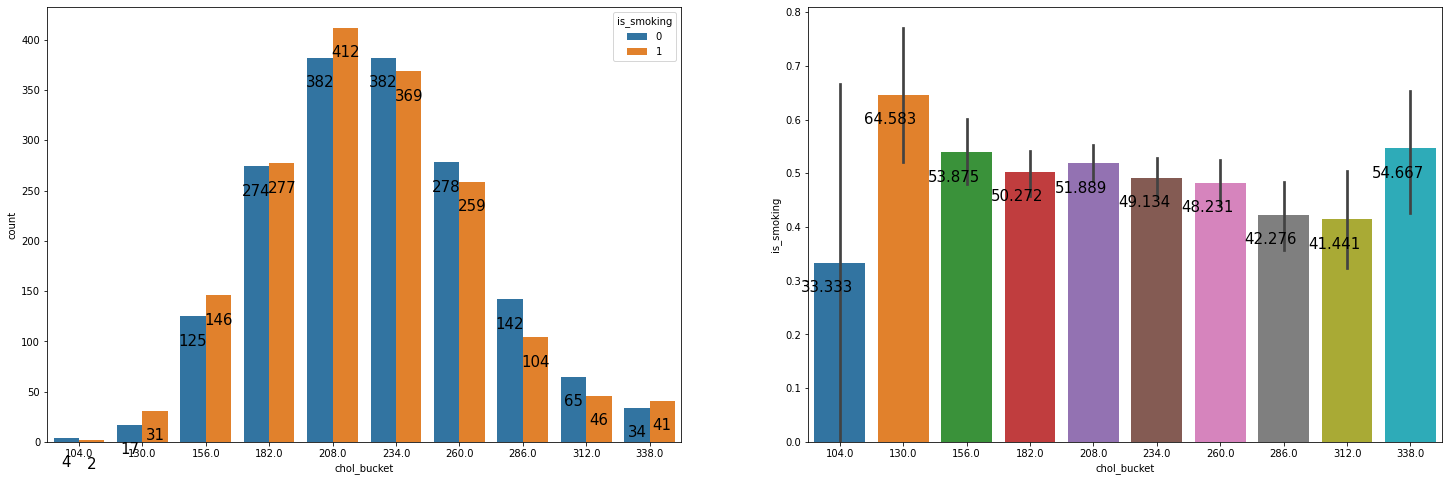

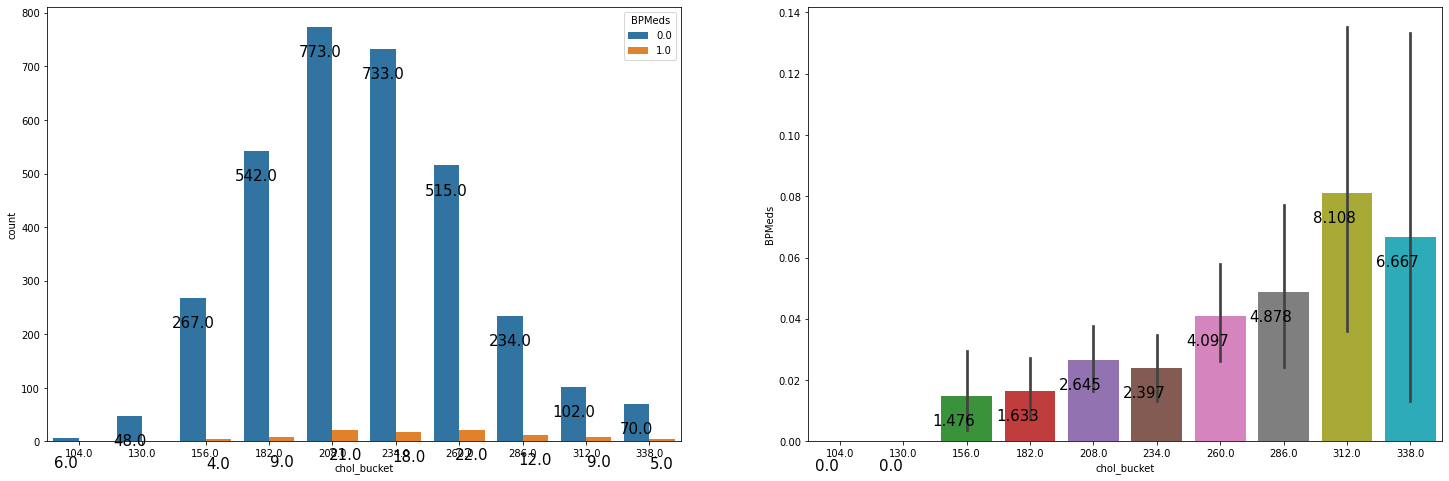

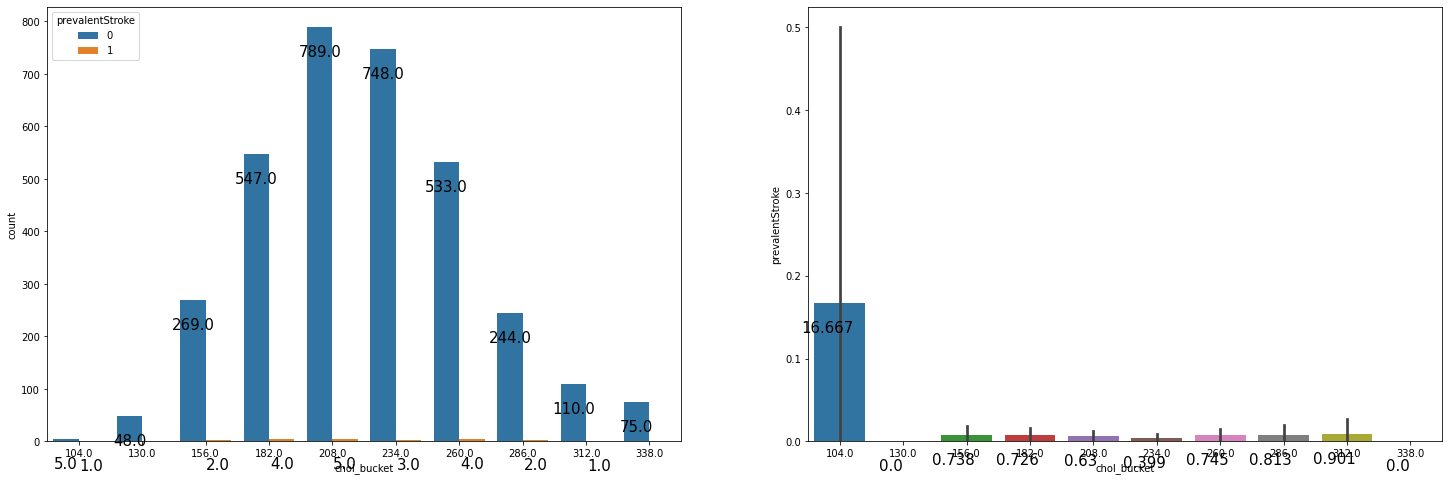

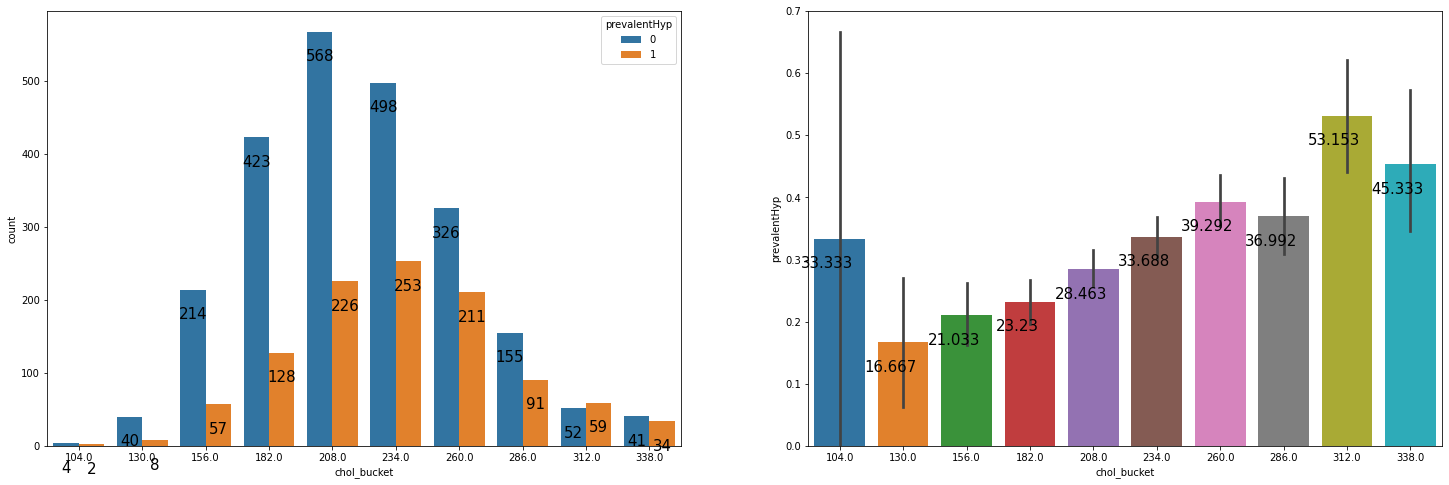

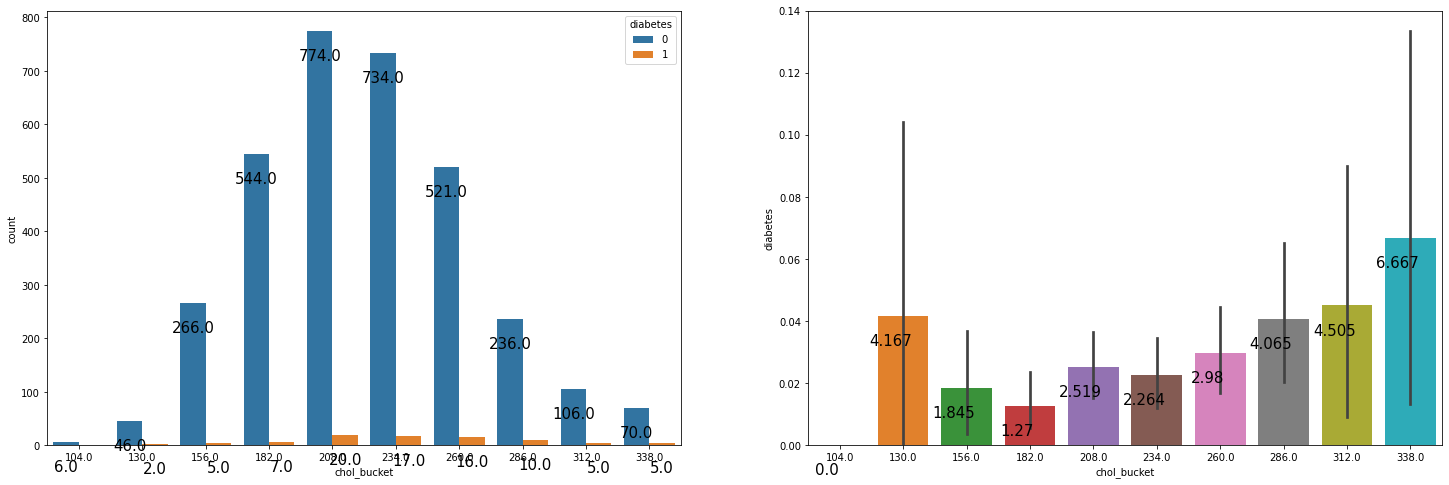

In [27]:
data_df['chol_bucket'] = data_df['totChol'].apply(lambda x : 26*(x//26))
for v in ['sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
  fig, axes = plt.subplots(1,2,figsize=(25,8))
  ch=sns.countplot(x='chol_bucket',hue=v,data=data_df, ax=axes[0])
  for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
  vh=sns.barplot('chol_bucket',v, data = data_df, ax=axes[1])
  for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

**Analysis with respect to cigsPerDay**

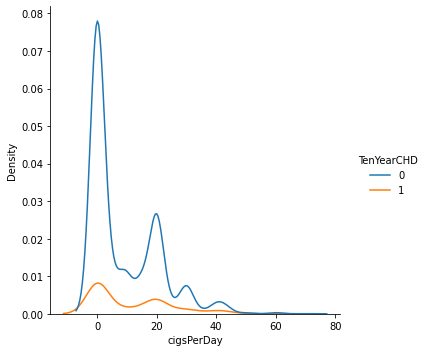

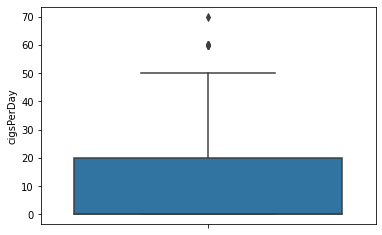

In [28]:
sns.displot(data=data_df, x='cigsPerDay', hue='TenYearCHD', kind="kde")
plt.show()
sns.boxplot(data=data_df,y='cigsPerDay')
plt.show()

In [29]:
vals = data_df.cigsPerDay.quantile([0.25,0.75])
print(vals)
iqr = vals.values[1] - vals.values[0]
min_lim, max_lim = vals.values[0] - 1.5*iqr, vals.values[1] + 1.5*iqr
data_df['cigsPerDay'] = data_df['cigsPerDay'].apply(lambda x : min_lim if x < min_lim else x)
data_df['cigsPerDay'] = data_df['cigsPerDay'].apply(lambda x : max_lim if x > max_lim else x)

0.25     0.0
0.75    20.0
Name: cigsPerDay, dtype: float64


In [30]:
max(data_df['cigsPerDay'])-min(data_df['cigsPerDay'])

50.0

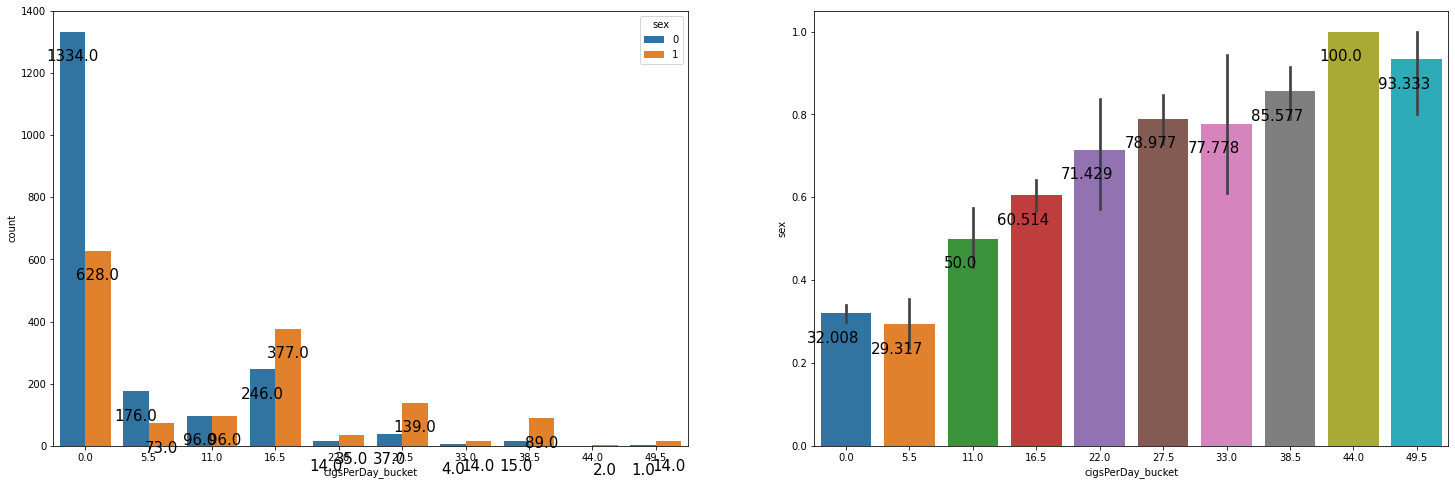

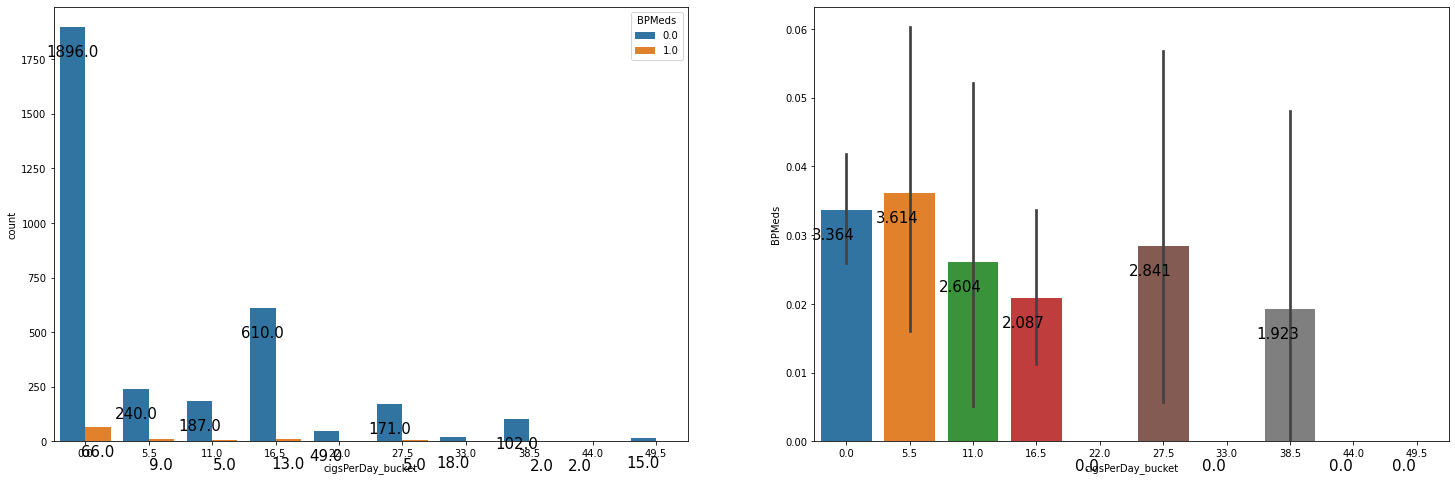

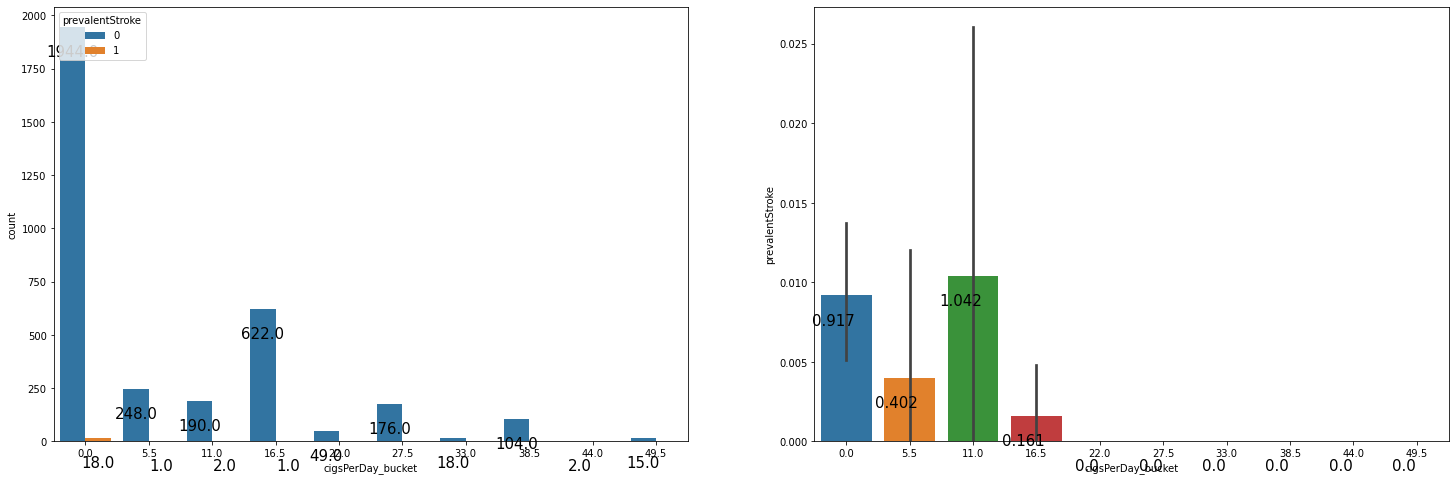

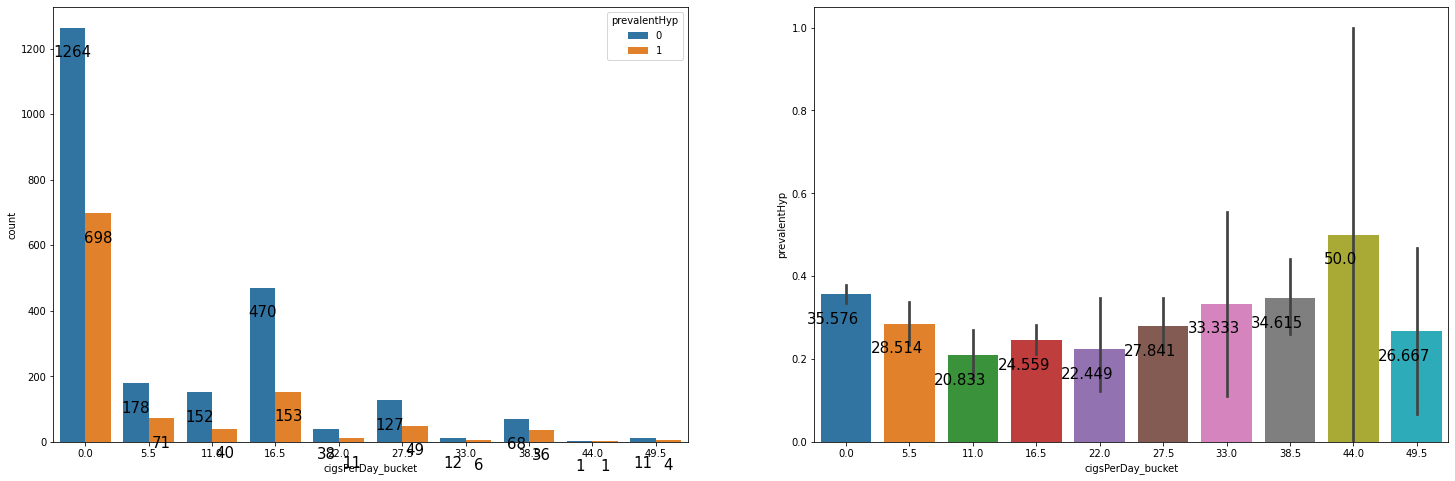

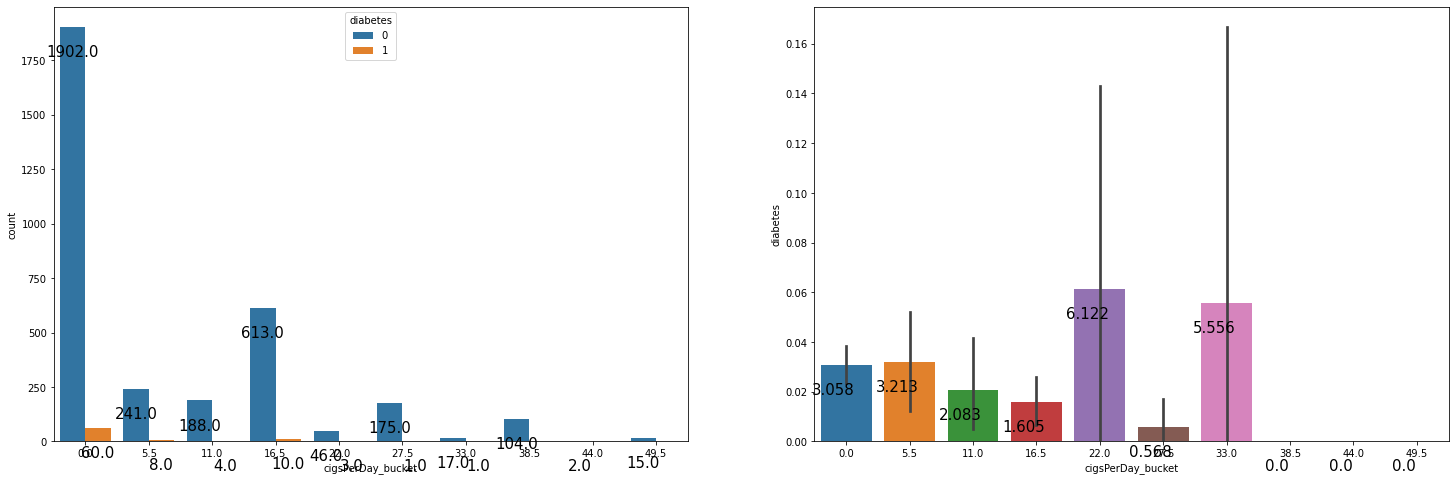

In [31]:
data_df['cigsPerDay_bucket'] = data_df['cigsPerDay'].apply(lambda x : 5.5*(x//5.5))
for v in ['sex', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
  fig, axes = plt.subplots(1,2,figsize=(25,8))
  ch=sns.countplot(x='cigsPerDay_bucket',hue=v,data=data_df, ax=axes[0])
  for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
  vh=sns.barplot('cigsPerDay_bucket',v, data = data_df, ax=axes[1])
  for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

**Analysis with respect to sysBP**

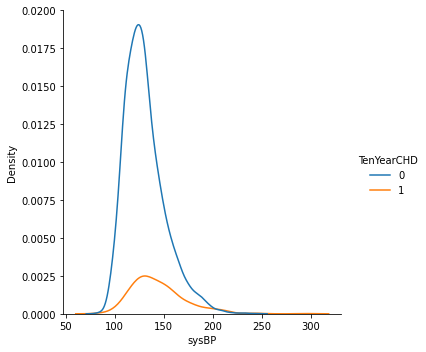

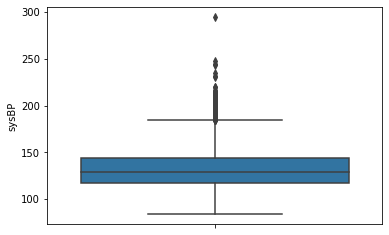

In [32]:
sns.displot(data=data_df, x='sysBP', hue='TenYearCHD', kind="kde")
plt.show()
sns.boxplot(data=data_df,y='sysBP')
plt.show()

In [33]:
vals = data_df.sysBP.quantile([0.25,0.75])
print(vals)
iqr = vals.values[1] - vals.values[0]
min_lim, max_lim = vals.values[0] - 1.5*iqr, vals.values[1] + 1.5*iqr
data_df['sysBP'] = data_df['sysBP'].apply(lambda x : min_lim if x < min_lim else x)
data_df['sysBP'] = data_df['sysBP'].apply(lambda x : max_lim if x > max_lim else x)

0.25    117.0
0.75    144.0
Name: sysBP, dtype: float64


In [34]:
max(data_df['sysBP'])-min(data_df['sysBP'])

101.0

In [35]:
data_df['sysBP_bucket'] = data_df['sysBP'].apply(lambda x : 11*(x//11))

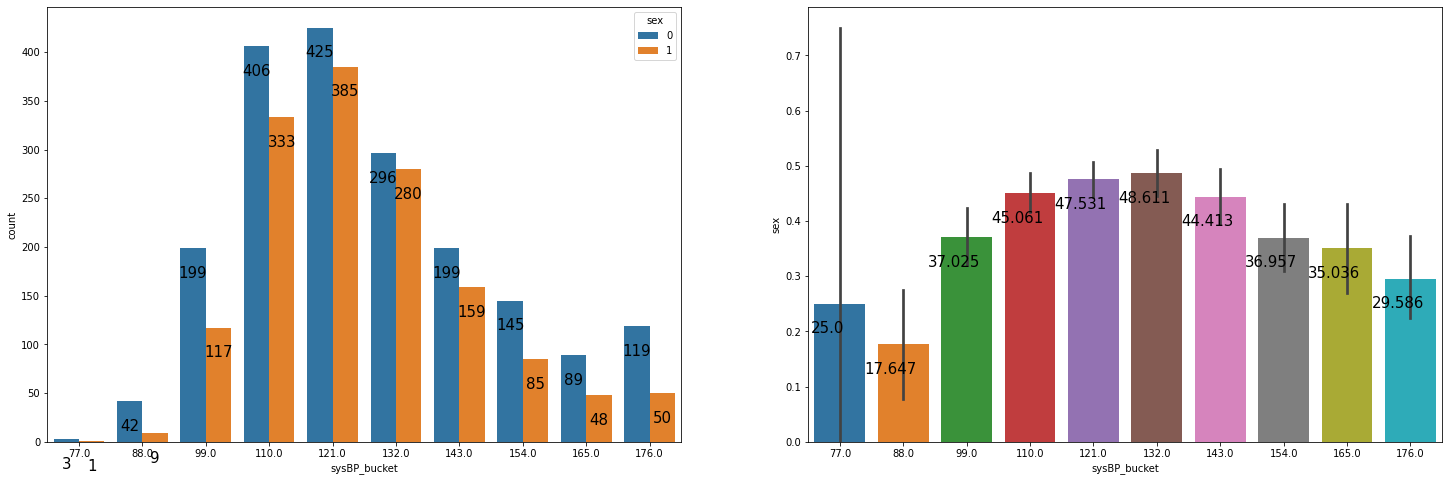

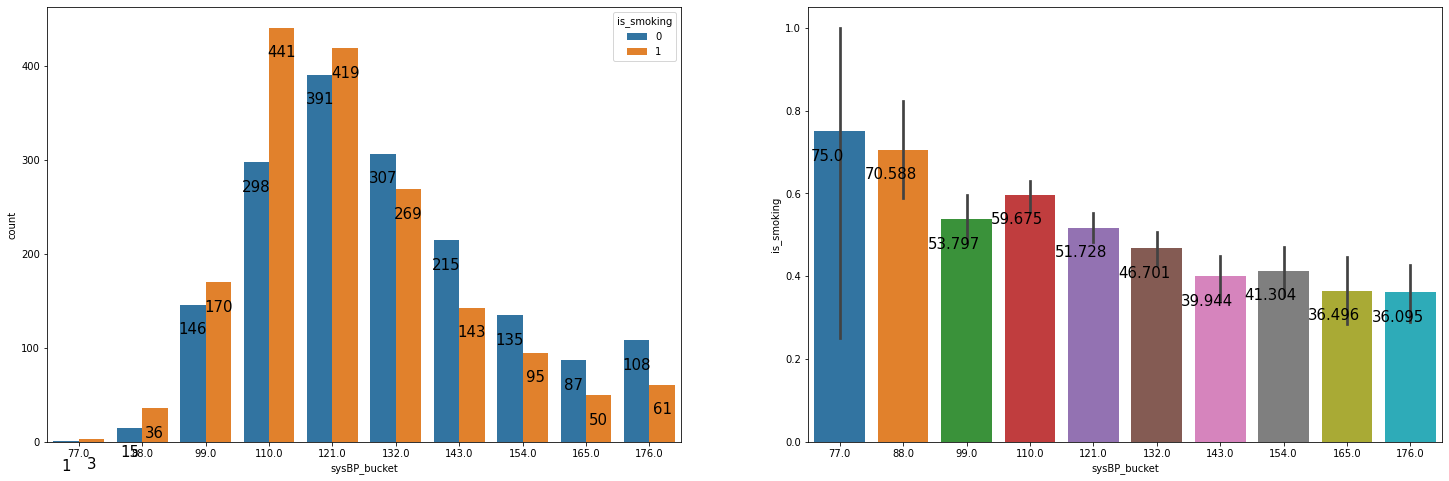

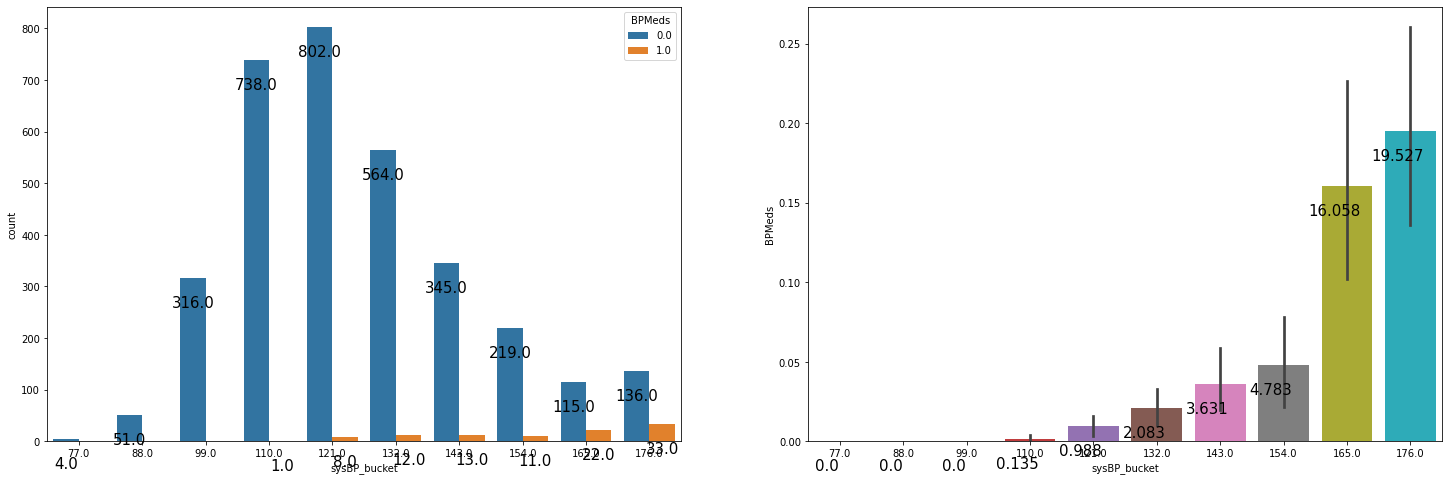

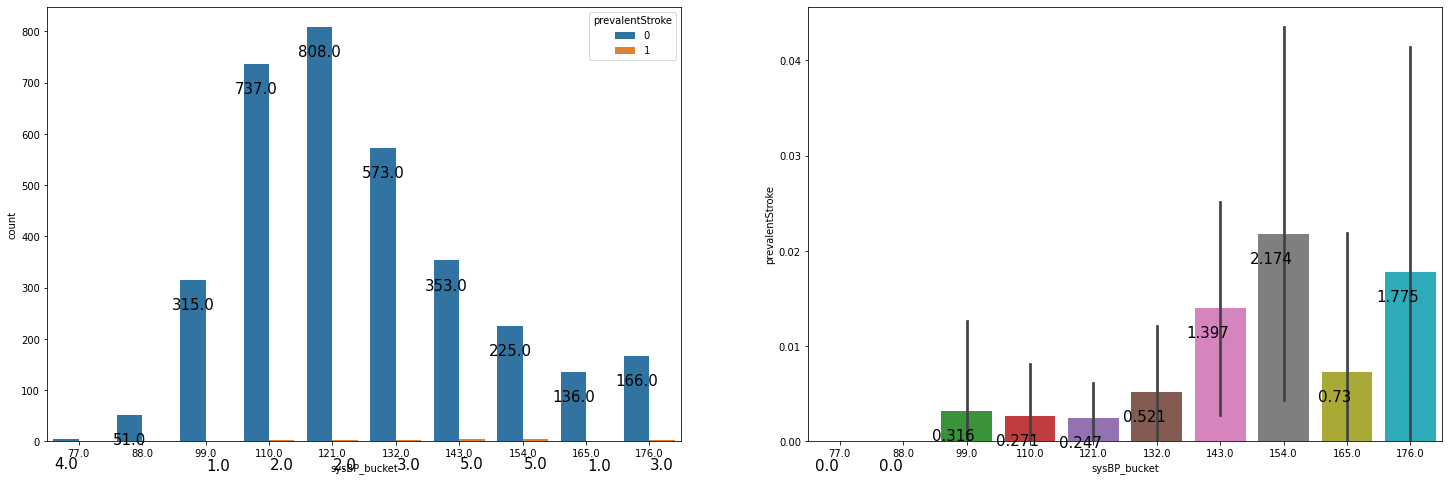

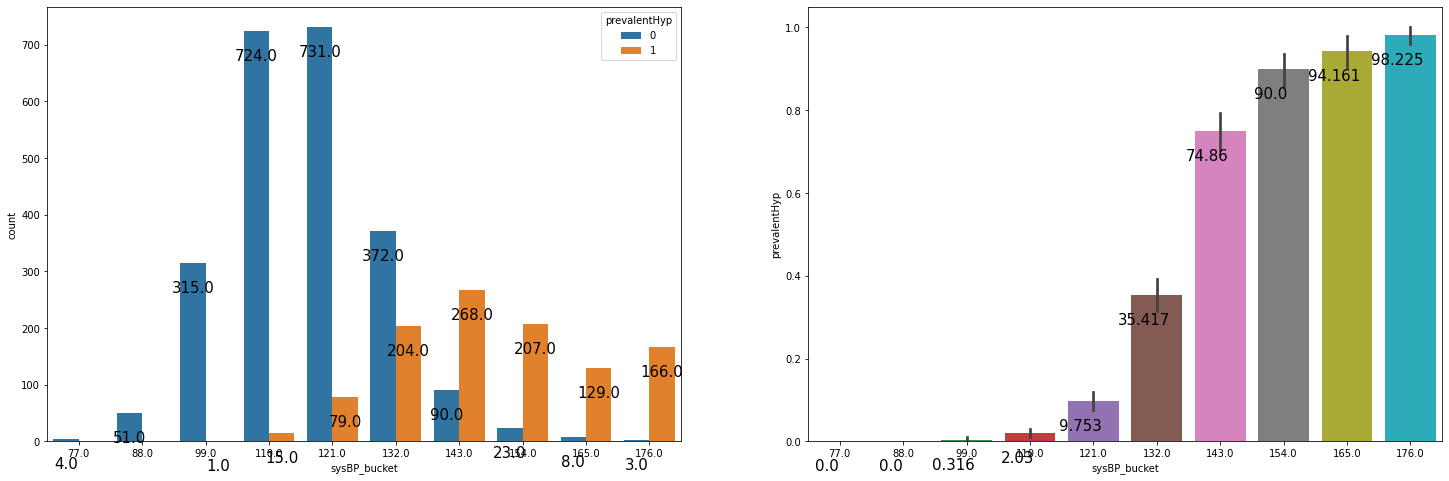

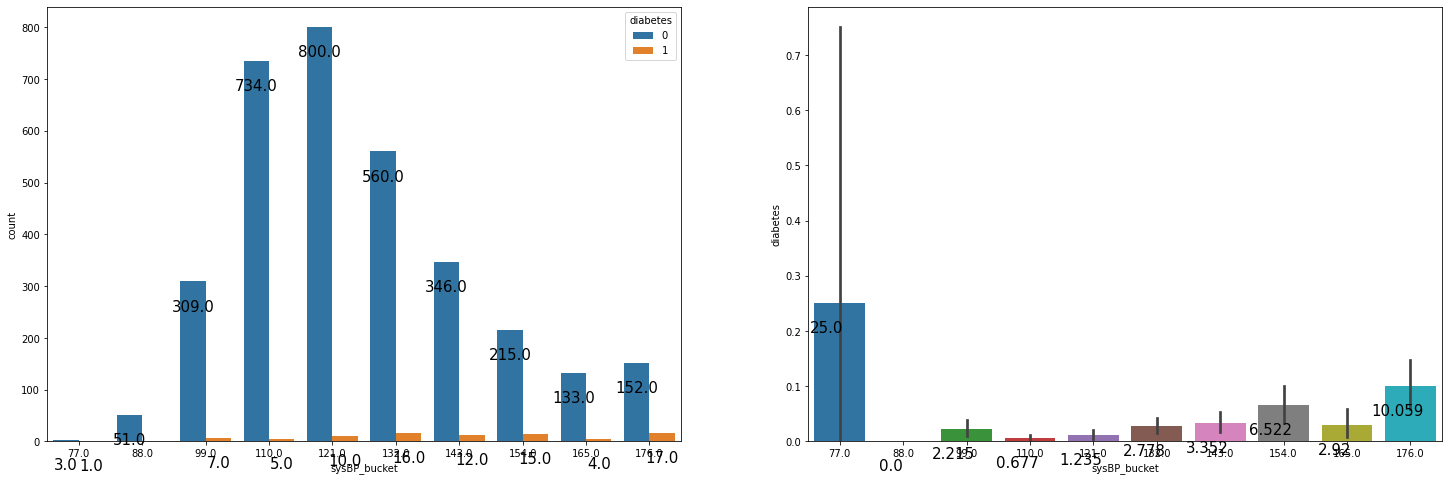

In [36]:

for v in ['sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
  fig, axes = plt.subplots(1,2,figsize=(25,8))
  ch=sns.countplot(x='sysBP_bucket',hue=v,data=data_df, ax=axes[0])
  for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
  vh=sns.barplot('sysBP_bucket',v, data = data_df, ax=axes[1])
  for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

**Analysis with respect to diaBP**

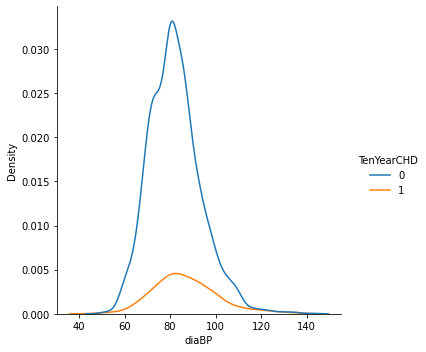

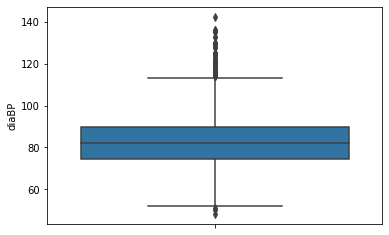

In [37]:
sns.displot(data=data_df, x='diaBP', hue='TenYearCHD', kind="kde")
plt.show()
sns.boxplot(data=data_df,y='diaBP')
plt.show()

In [38]:
vals = data_df.diaBP.quantile([0.25,0.75])
print(vals)
iqr = vals.values[1] - vals.values[0]
min_lim, max_lim = vals.values[0] - 1.5*iqr, vals.values[1] + 1.5*iqr
data_df['diaBP'] = data_df['diaBP'].apply(lambda x : min_lim if x < min_lim else x)
data_df['diaBP'] = data_df['diaBP'].apply(lambda x : max_lim if x > max_lim else x)

0.25    74.5
0.75    90.0
Name: diaBP, dtype: float64


In [39]:
data_df['diaBP_bucket'] = data_df['diaBP'].apply(lambda x : 7*(x//7))

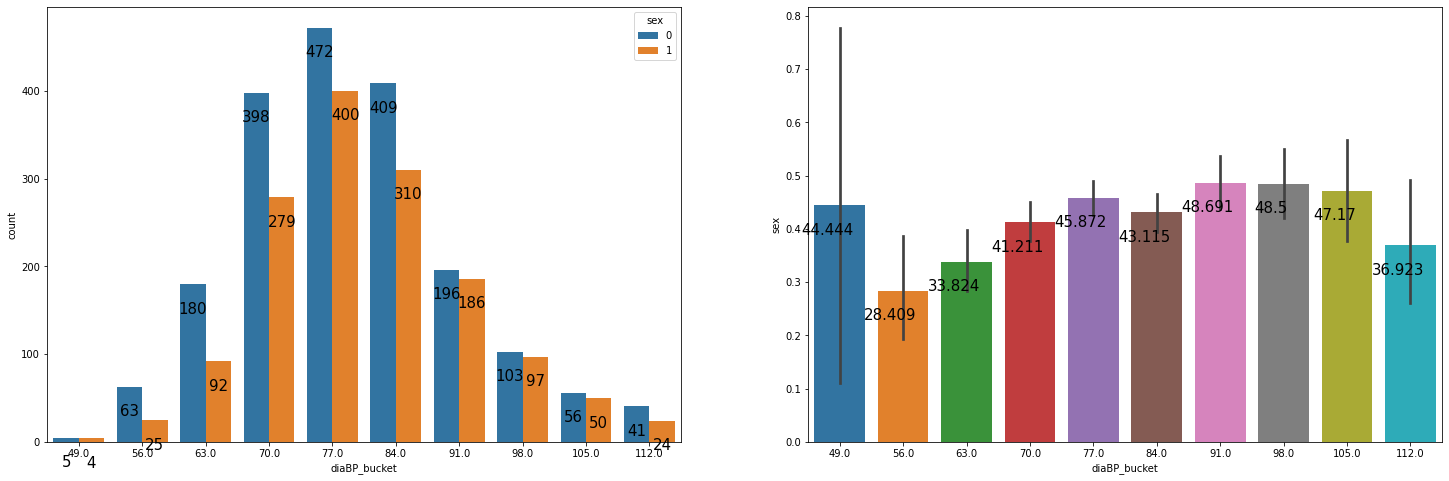

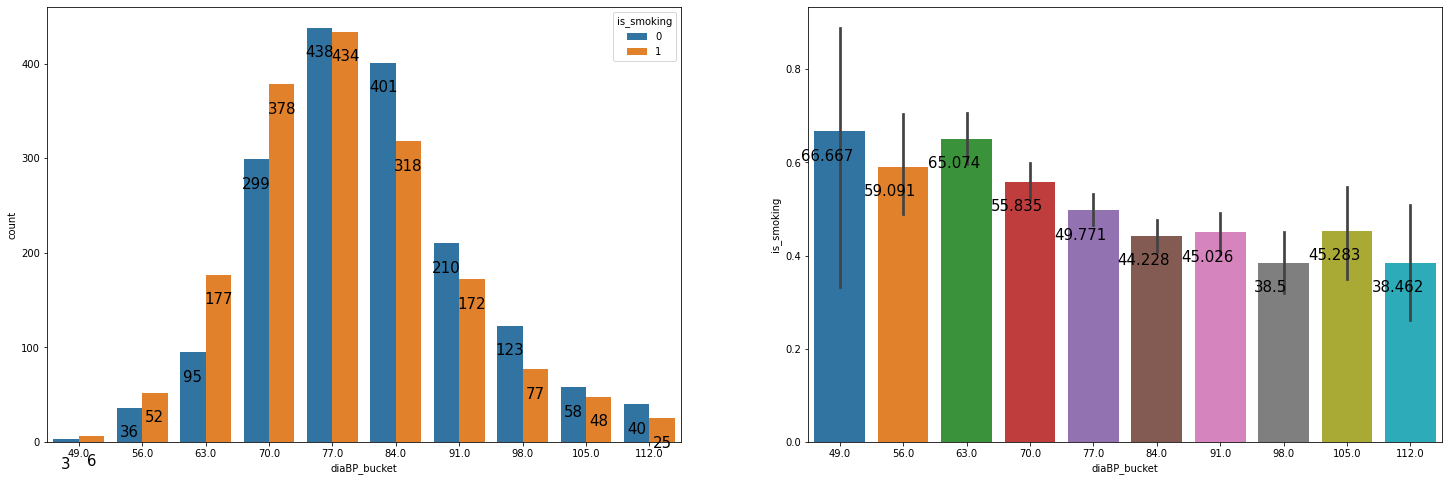

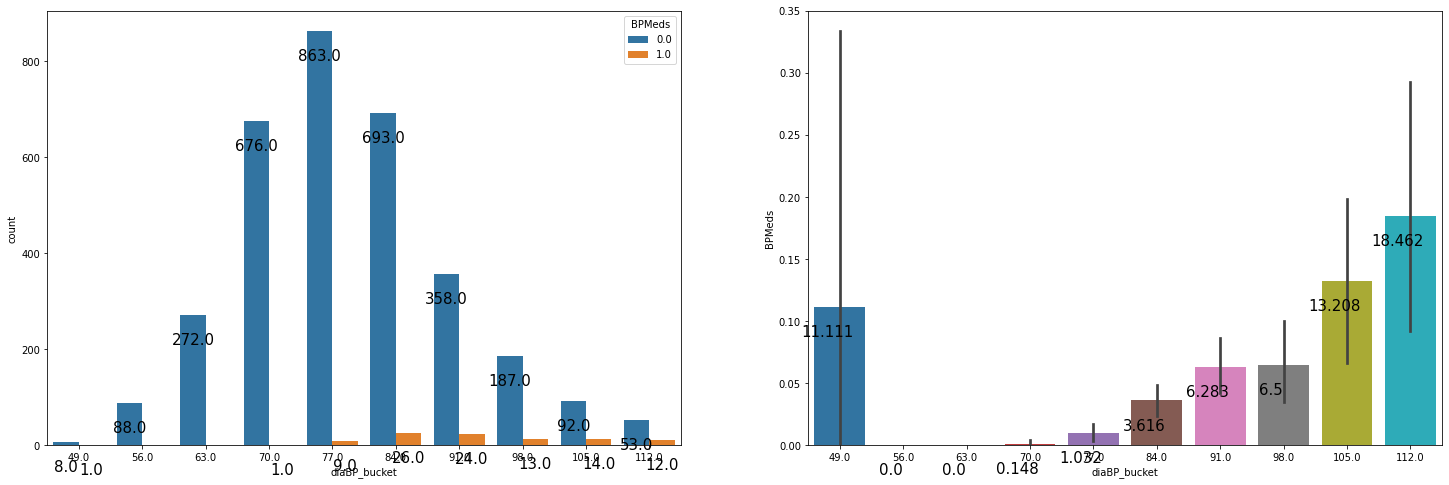

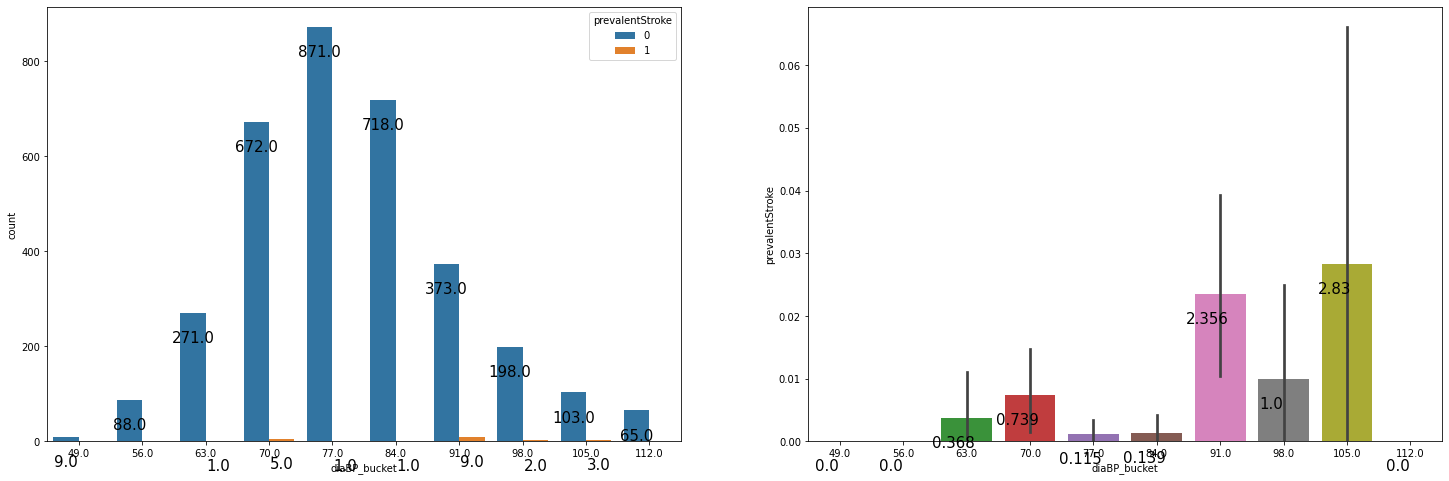

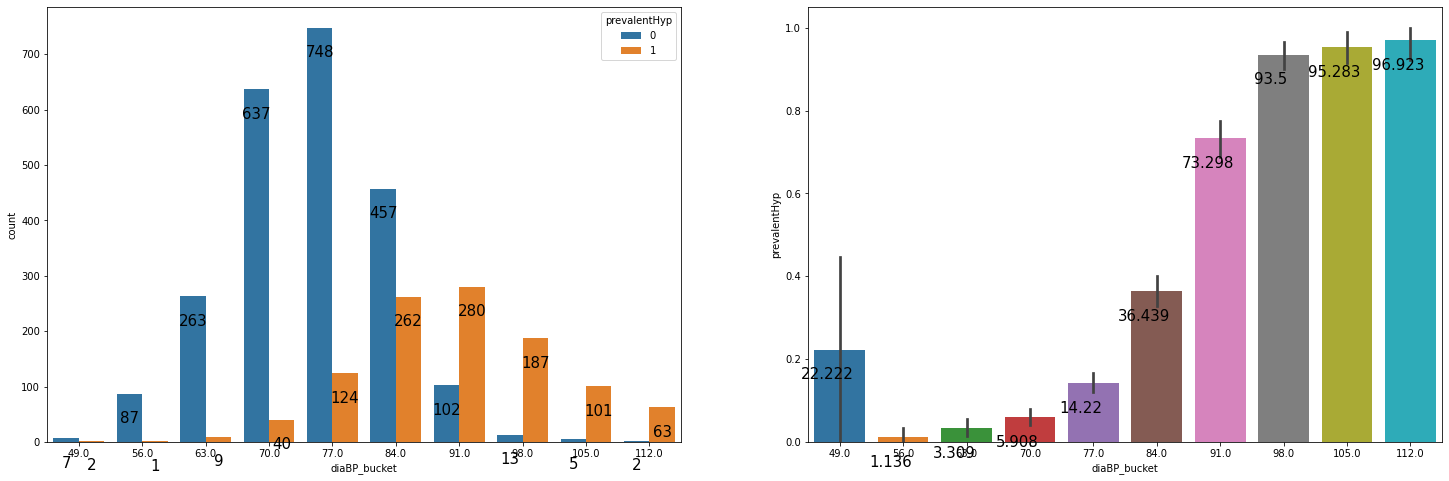

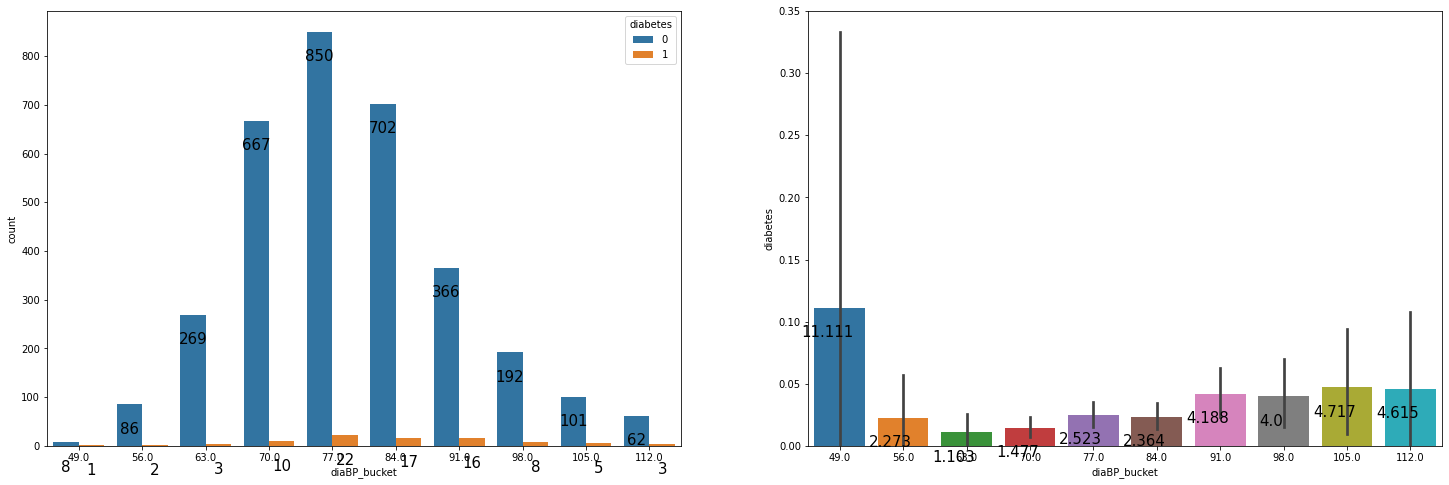

In [40]:
for v in ['sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
  fig, axes = plt.subplots(1,2,figsize=(25,8))
  ch=sns.countplot(x='diaBP_bucket',hue=v,data=data_df, ax=axes[0])
  for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
  vh=sns.barplot('diaBP_bucket',v, data = data_df, ax=axes[1])
  for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

**Analysis with respect to BMI**

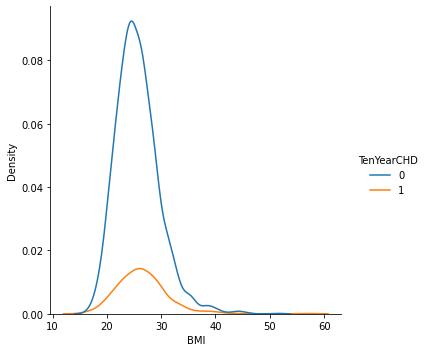

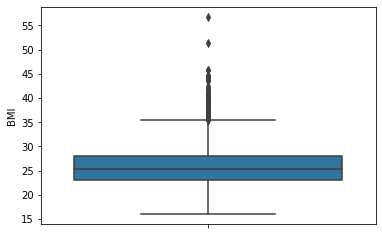

In [41]:
sns.displot(data=data_df, x='BMI', hue='TenYearCHD', kind="kde")
plt.show()
sns.boxplot(data=data_df,y='BMI')
plt.show()

In [42]:
vals = data_df.BMI.quantile([0.25,0.75])
print(vals)
iqr = vals.values[1] - vals.values[0]
min_lim, max_lim = vals.values[0] - 1.5*iqr, vals.values[1] + 1.5*iqr
data_df['BMI'] = data_df['BMI'].apply(lambda x : min_lim if x < min_lim else x)
data_df['BMI'] = data_df['BMI'].apply(lambda x : max_lim if x > max_lim else x)

0.25    23.0300
0.75    27.9975
Name: BMI, dtype: float64


In [43]:
data_df.describe()

,id,age,sex,is_smoking,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age_bucket,chol_bucket,cigsPerDay_bucket,sysBP_bucket,diaBP_bucket
count,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000
mean,1694.500000,49.542183,0.432743,0.497640,9.046962,236.595929,132.117257,82.730236,25.707865,75.980236,81.989912,0.150737,47.539823,224.267257,7.406342,126.954277,79.707080
std,978.753033,8.592878,0.495529,0.500068,11.732238,42.887742,20.751844,11.526170,3.812313,11.971340,23.295045,0.357846,8.679944,43.759509,10.667028,20.722804,11.758087
min,0.000000,32.000000,0.000000,0.000000,0.000000,119.000000,83.500000,51.250000,15.960000,45.000000,40.000000,0.000000,30.000000,104.000000,0.000000,77.000000,49.000000
25%,847.250000,42.000000,0.000000,0.000000,0.000000,206.000000,117.000000,74.500000,23.030000,68.000000,72.000000,0.000000,40.000000,182.000000,0.000000,110.000000,70.000000
50%,1694.500000,49.000000,0.000000,0.000000,0.000000,234.000000,128.500000,82.000000,25.380000,75.000000,78.000000,0.000000,45.000000,234.000000,0.000000,121.000000,77.000000
75%,2541.750000,56.000000,1.000000,1.000000,20.000000,264.000000,144.000000,90.000000,27.997500,83.000000,86.000000,0.000000,55.000000,260.000000,16.500000,143.000000,84.000000
max,3389.000000,70.000000,1.000000,1.000000,50.000000,351.000000,184.500000,113.250000,35.448750,143.000000,394.000000,1.000000,70.000000,338.000000,49.500000,176.000000,112.000000


In [44]:

data_df['BMI_bucket'] = data_df['BMI'].apply(lambda x : round(1.98*(x//1.98),1))

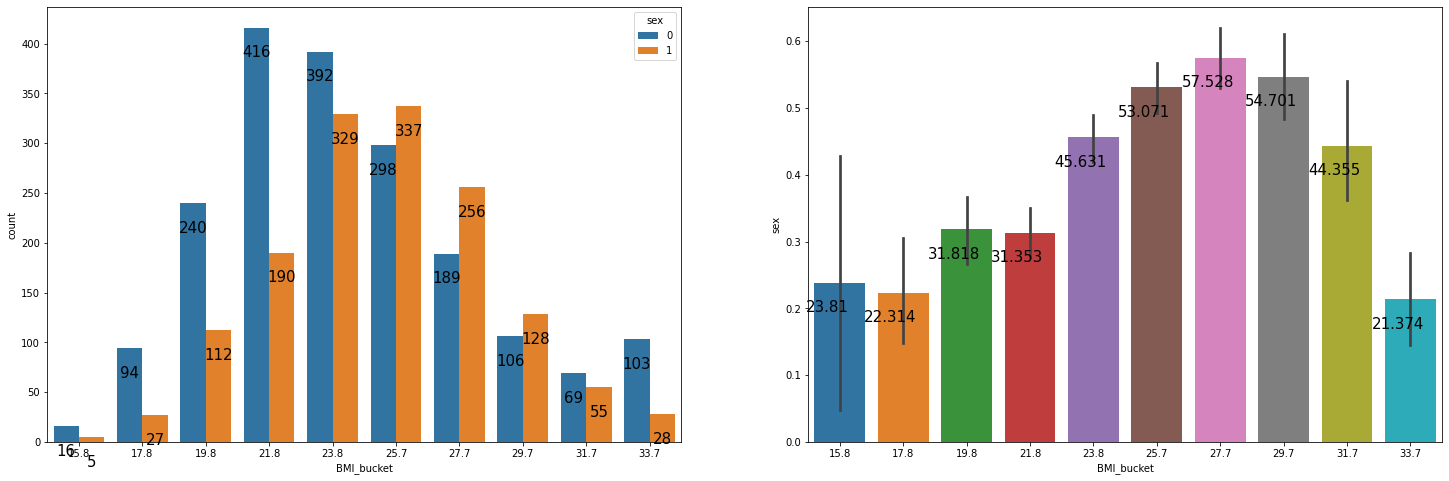

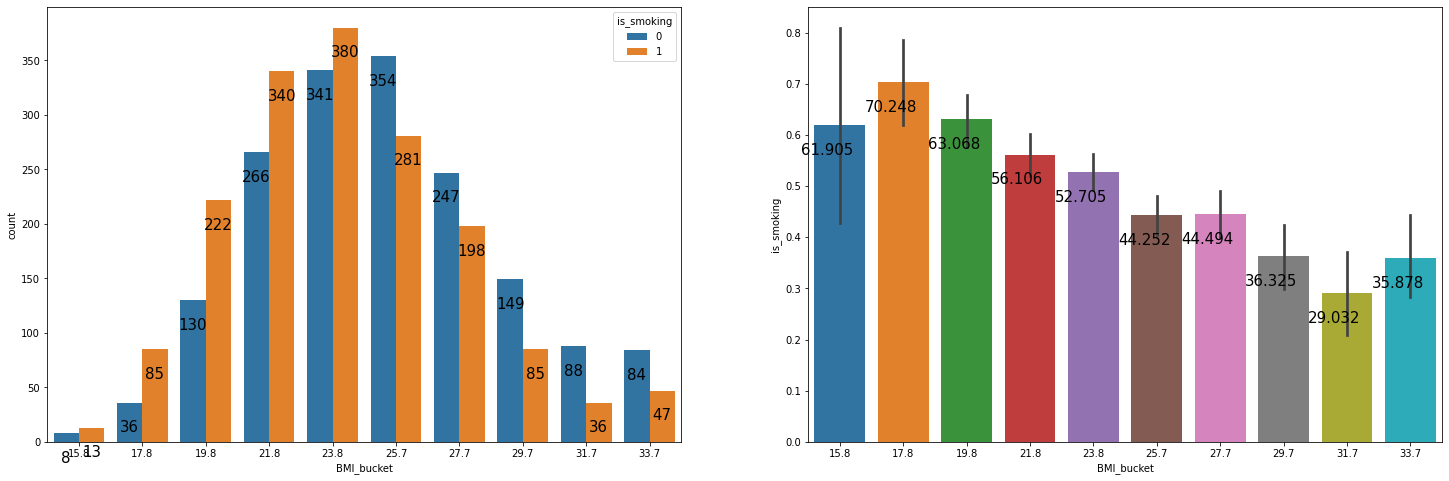

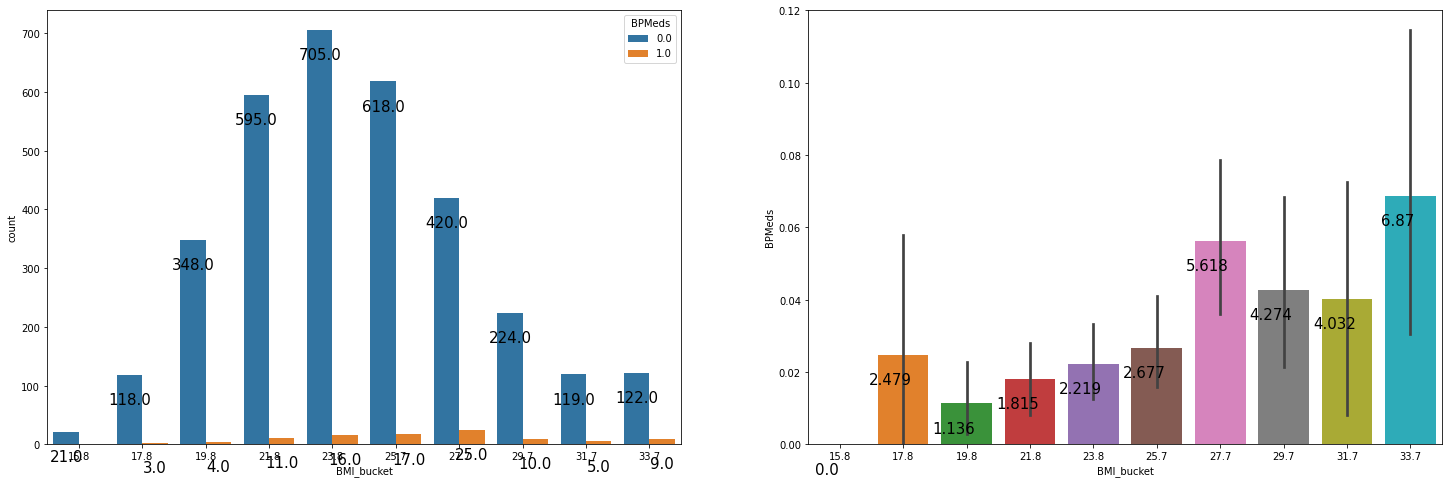

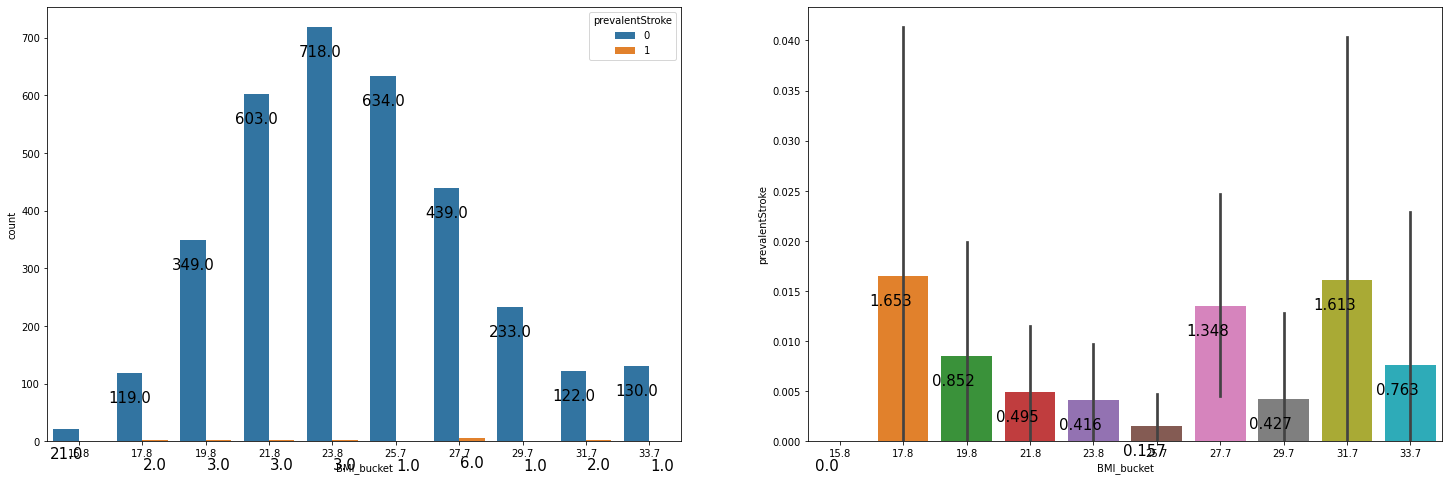

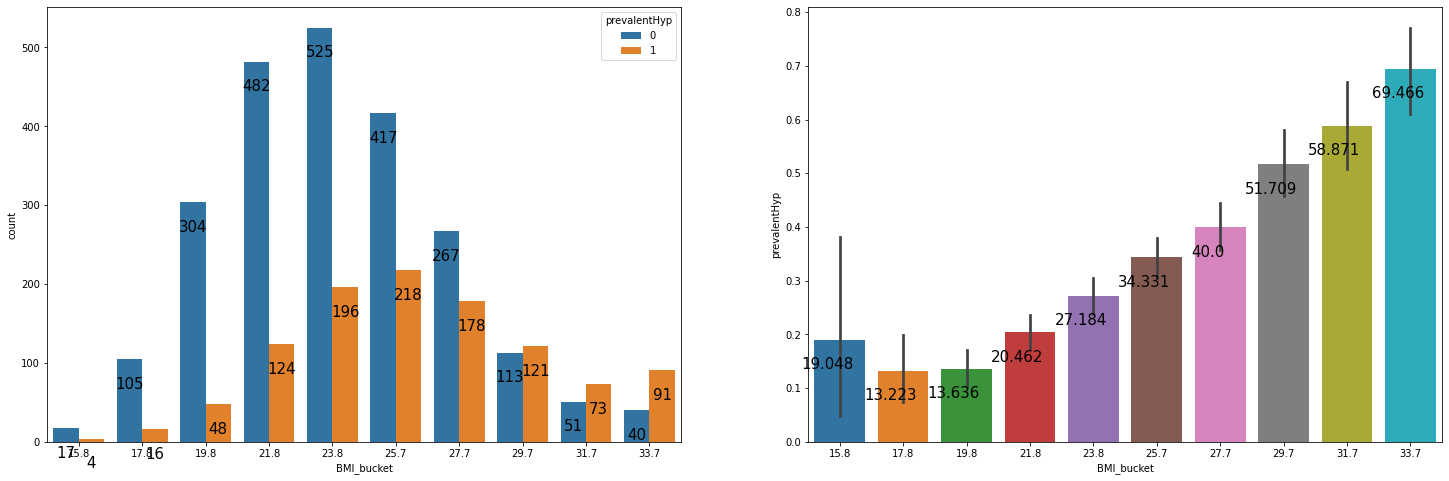

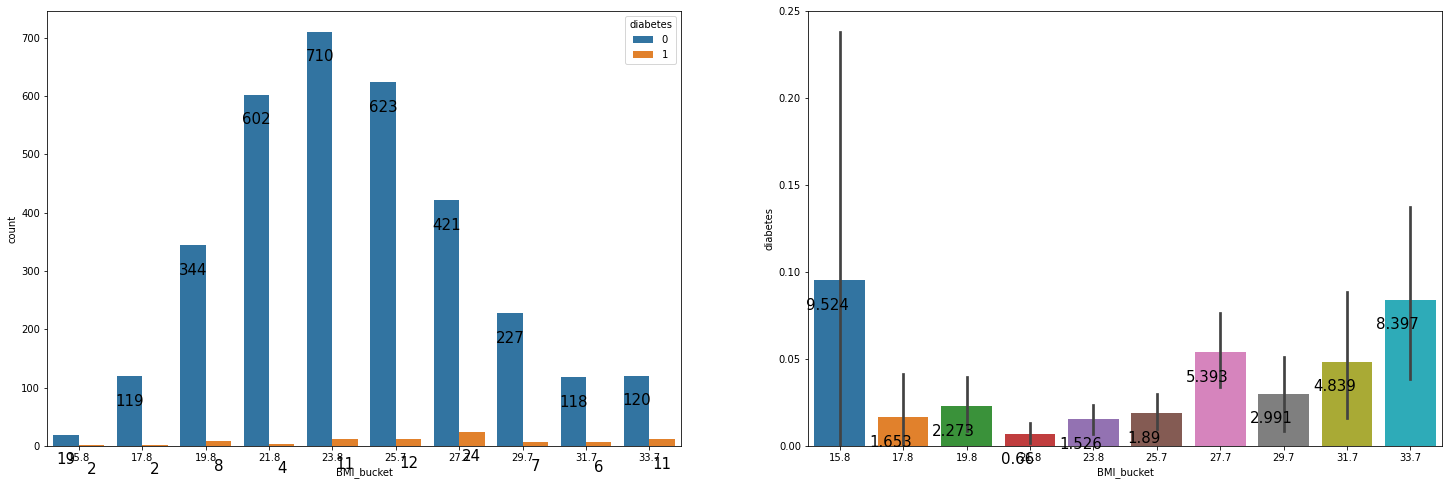

In [45]:
for v in ['sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
  fig, axes = plt.subplots(1,2,figsize=(25,8))
  ch=sns.countplot(x='BMI_bucket',hue=v,data=data_df, ax=axes[0])
  for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
  vh=sns.barplot('BMI_bucket',v, data = data_df, ax=axes[1])
  for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

**Analysis with respect to BMI**

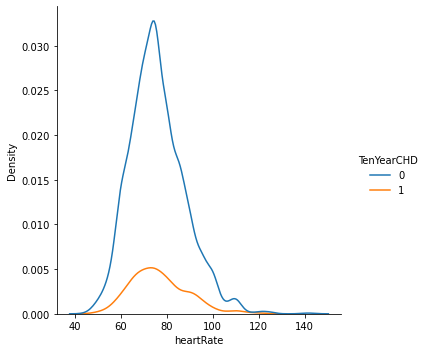

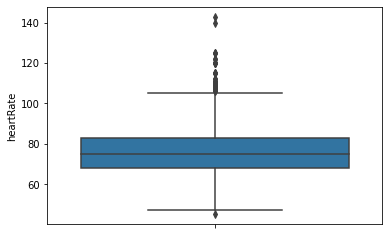

In [46]:
sns.displot(data=data_df, x='heartRate', hue='TenYearCHD', kind="kde")
plt.show()
sns.boxplot(data=data_df,y='heartRate')
plt.show()

In [47]:
vals = data_df.heartRate.quantile([0.25,0.75])
print(vals)
iqr = vals.values[1] - vals.values[0]
min_lim, max_lim = vals.values[0] - 1.5*iqr, vals.values[1] + 1.5*iqr
data_df['heartRate'] = data_df['heartRate'].apply(lambda x : min_lim if x < min_lim else x)
data_df['heartRate'] = data_df['heartRate'].apply(lambda x : max_lim if x > max_lim else x)

0.25    68.0
0.75    83.0
Name: heartRate, dtype: float64


In [48]:
data_df['hr_bucket'] = data_df['heartRate'].apply(lambda x : 6.5*(x//6.5))

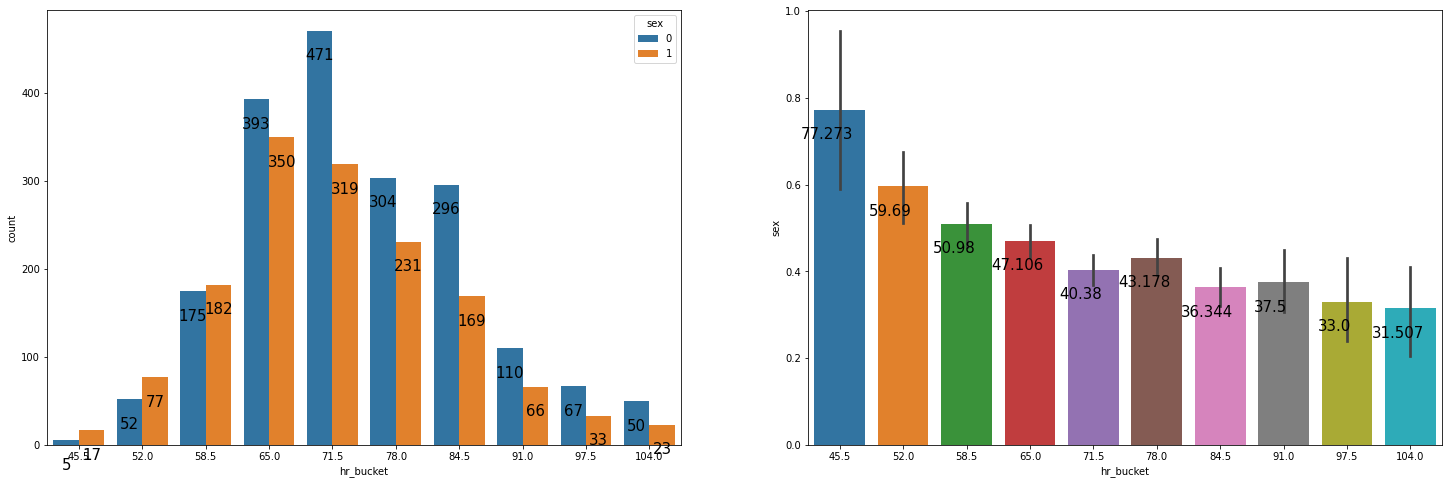

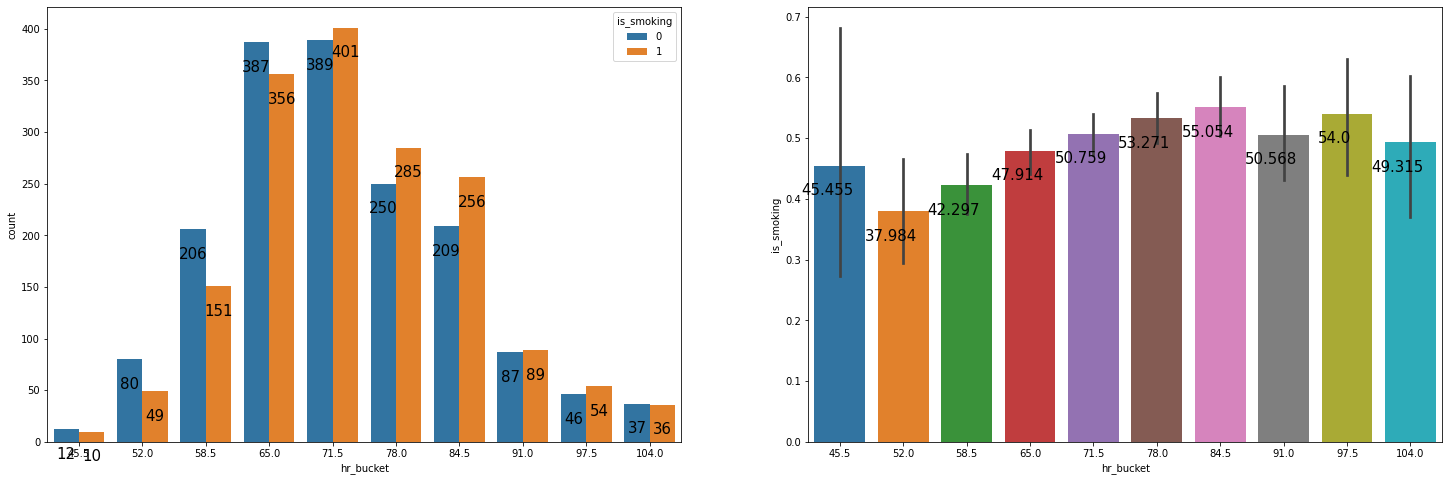

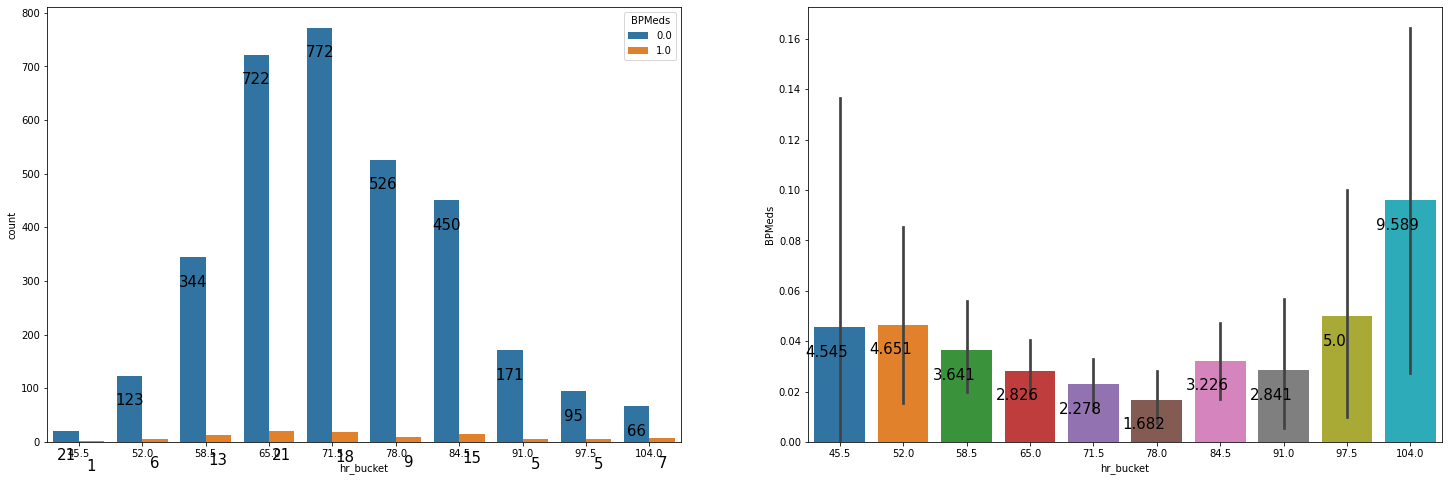

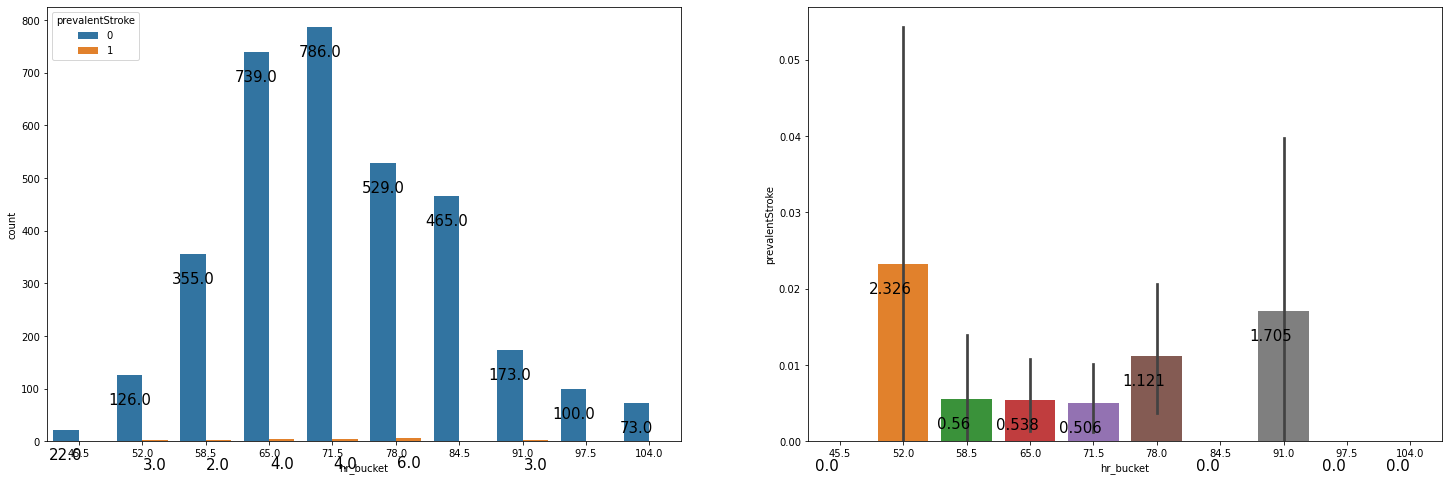

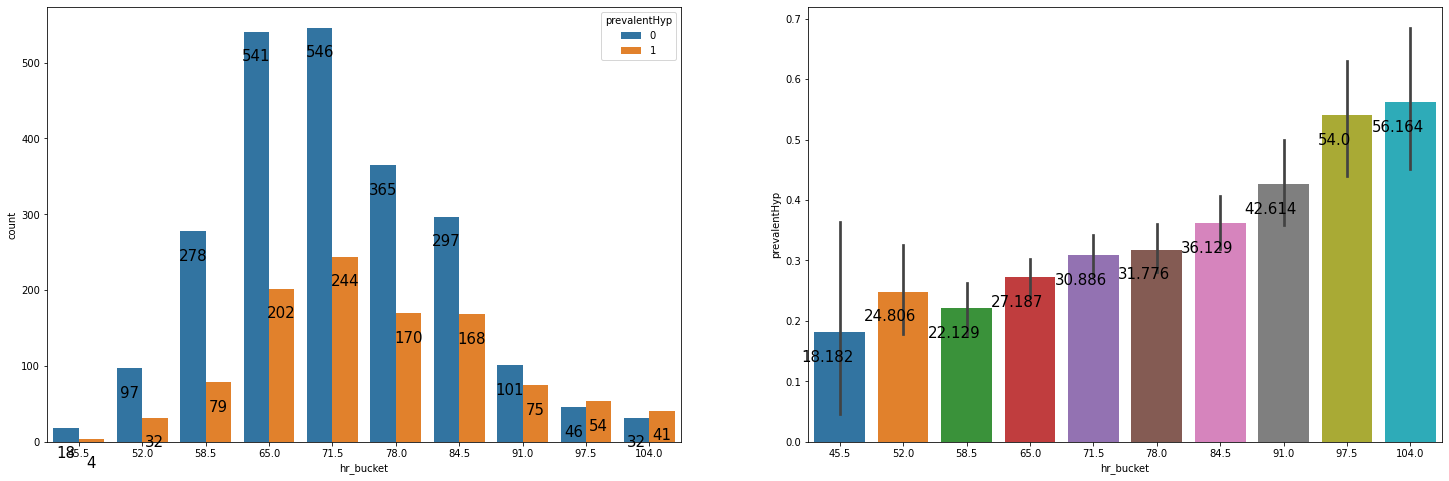

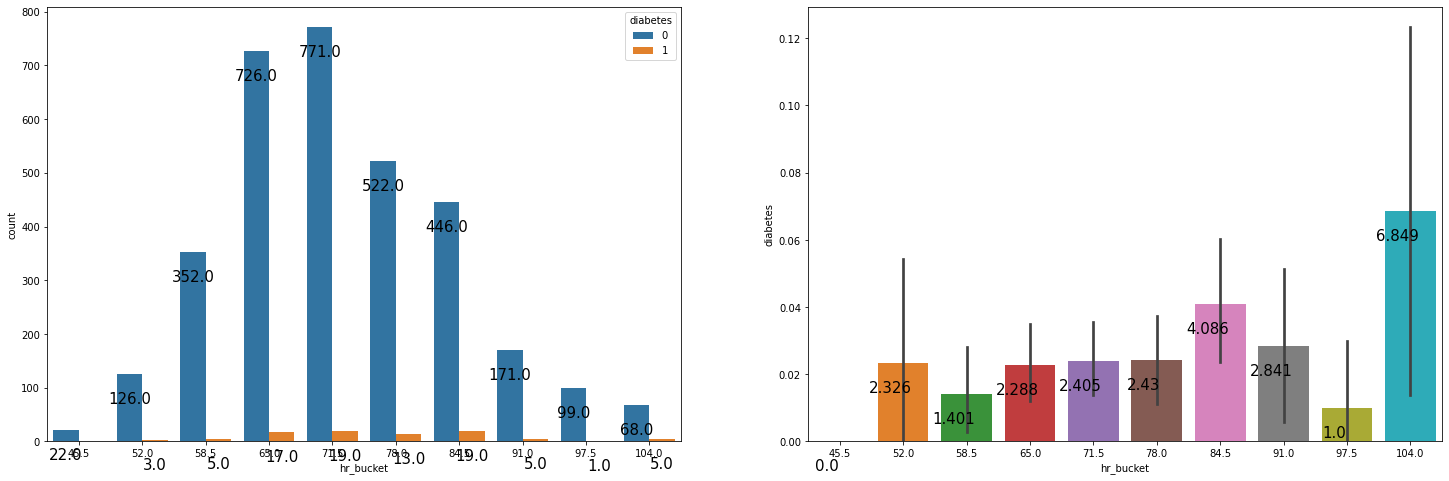

In [49]:
for v in ['sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
  fig, axes = plt.subplots(1,2,figsize=(25,8))
  ch=sns.countplot(x='hr_bucket',hue=v,data=data_df, ax=axes[0])
  for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
  vh=sns.barplot('hr_bucket',v, data = data_df, ax=axes[1])
  for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

**Analysis with respect to glucose**

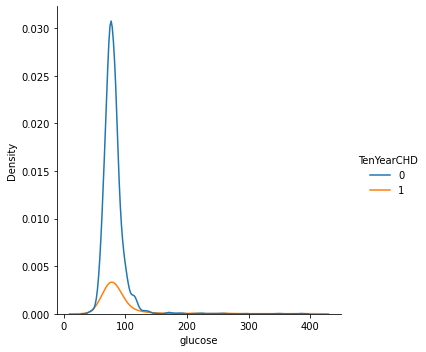

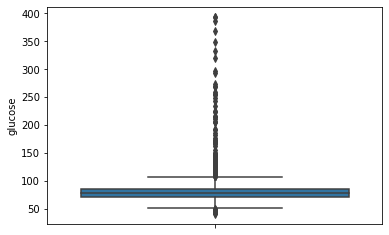

In [50]:
sns.displot(data=data_df, x='glucose', hue='TenYearCHD', kind="kde")
plt.show()
sns.boxplot(data=data_df,y='glucose')
plt.show()

In [51]:
vals = data_df.glucose.quantile([0.25,0.75])
print(vals)
iqr = vals.values[1] - vals.values[0]
min_lim, max_lim = vals.values[0] - 1.5*iqr, 145
data_df['glucose'] = data_df['glucose'].apply(lambda x : min_lim if x < min_lim else x)
data_df['glucose'] = data_df['glucose'].apply(lambda x : max_lim if x > max_lim else x)

0.25    72.0
0.75    86.0
Name: glucose, dtype: float64


In [52]:
data_df['glucose_bucket'] = data_df['glucose'].apply(lambda x : round(10*(x//10),1))

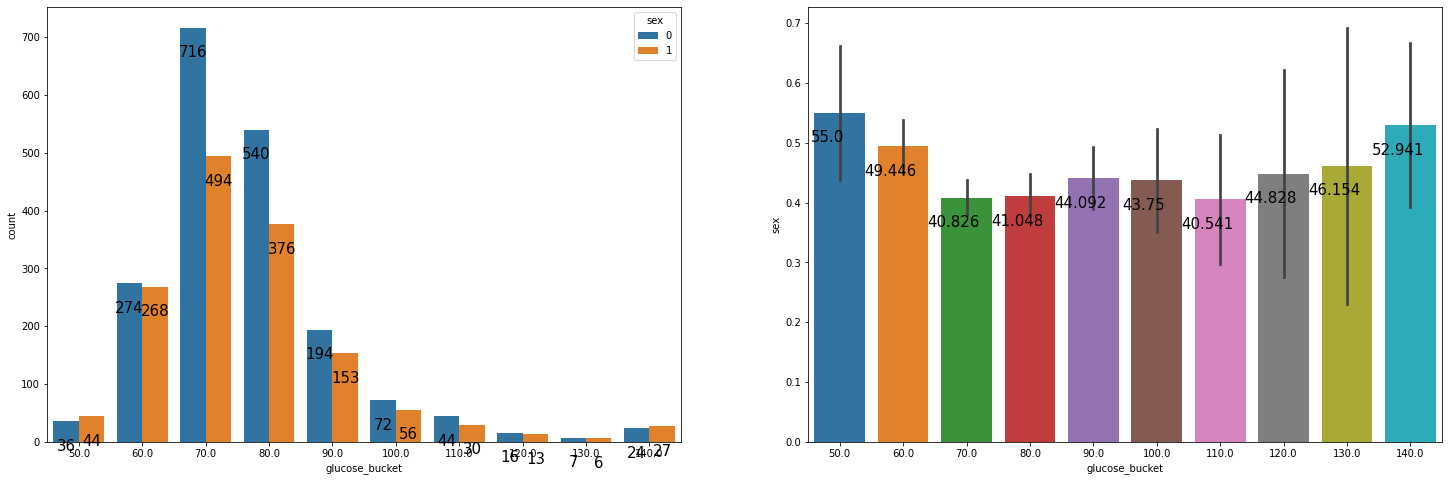

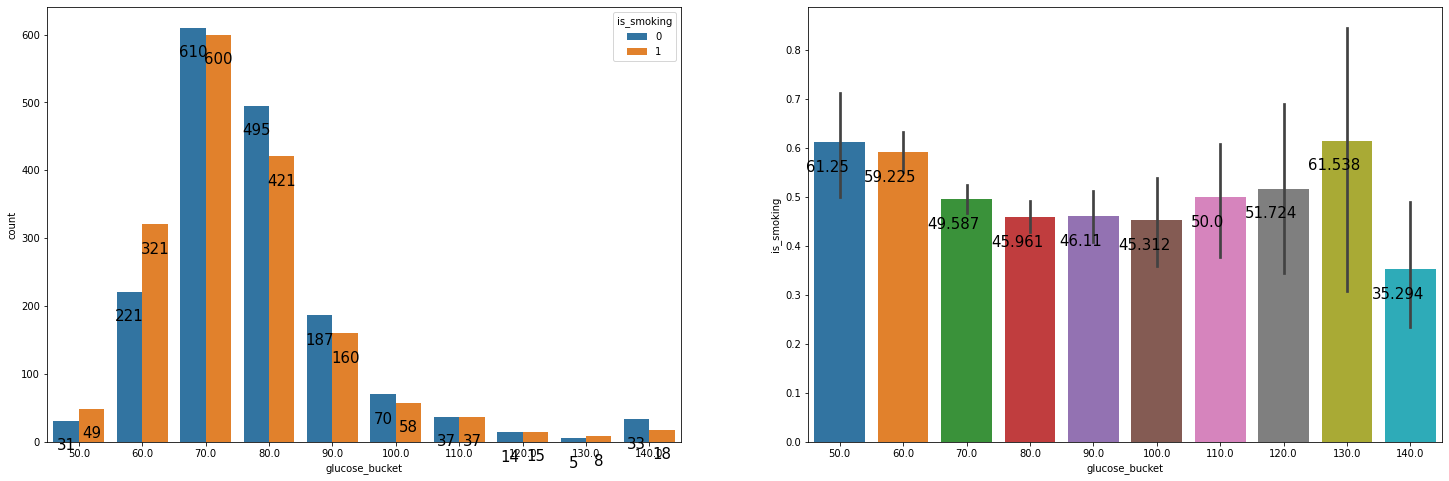

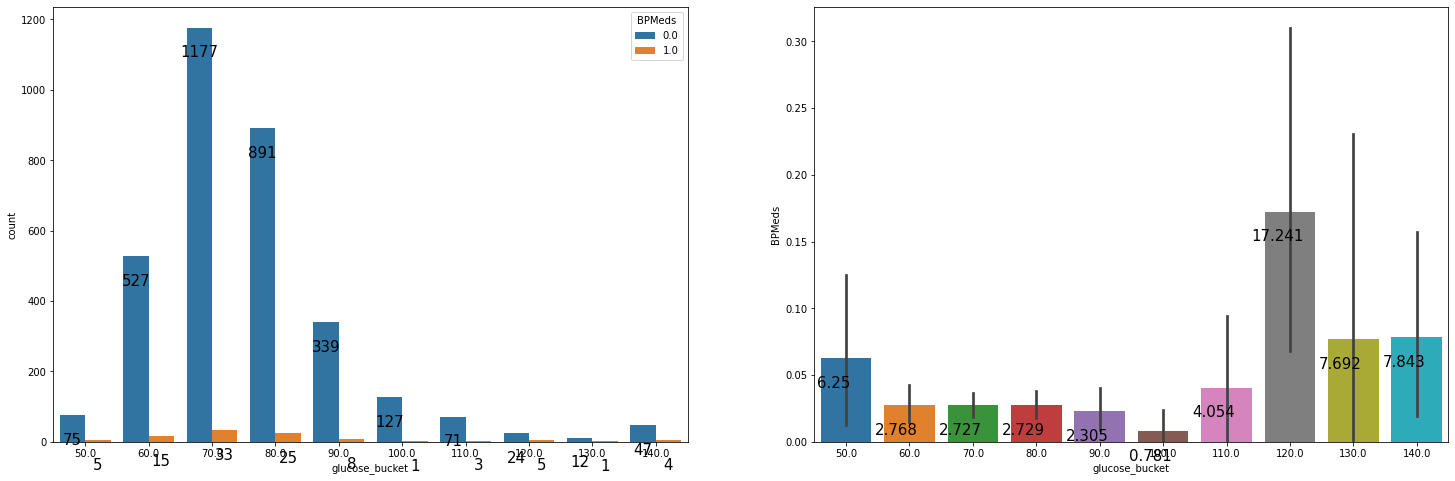

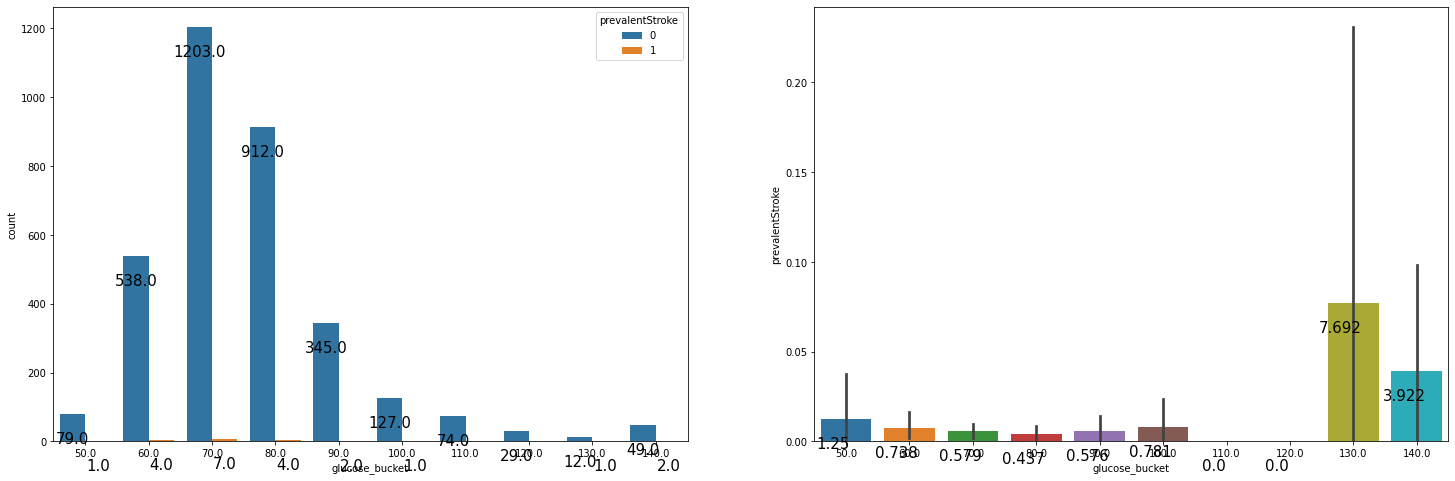

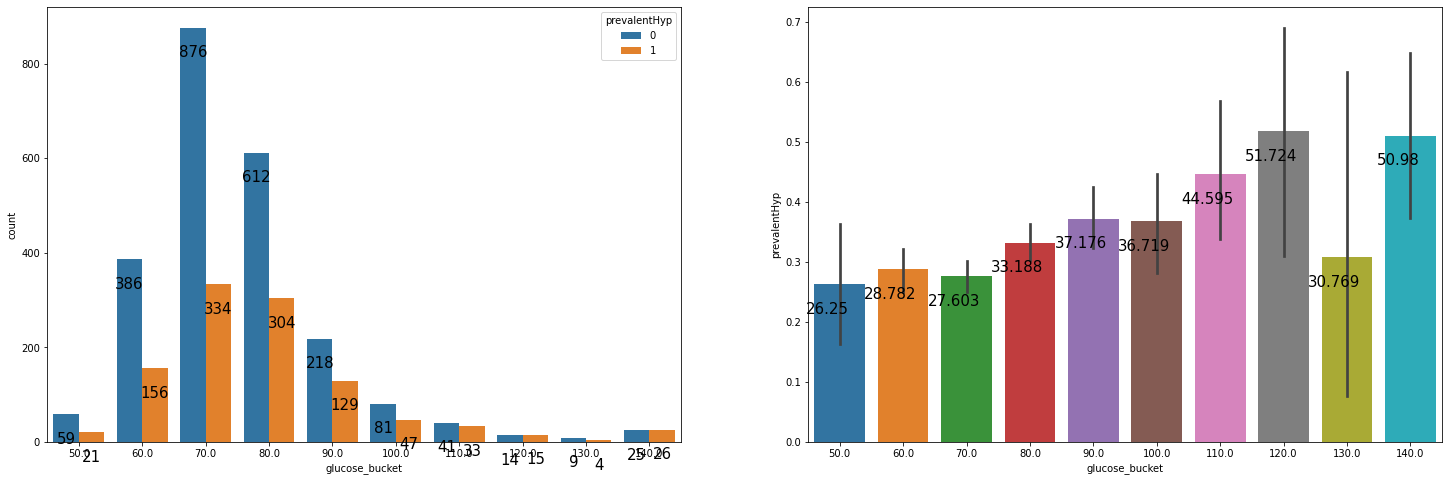

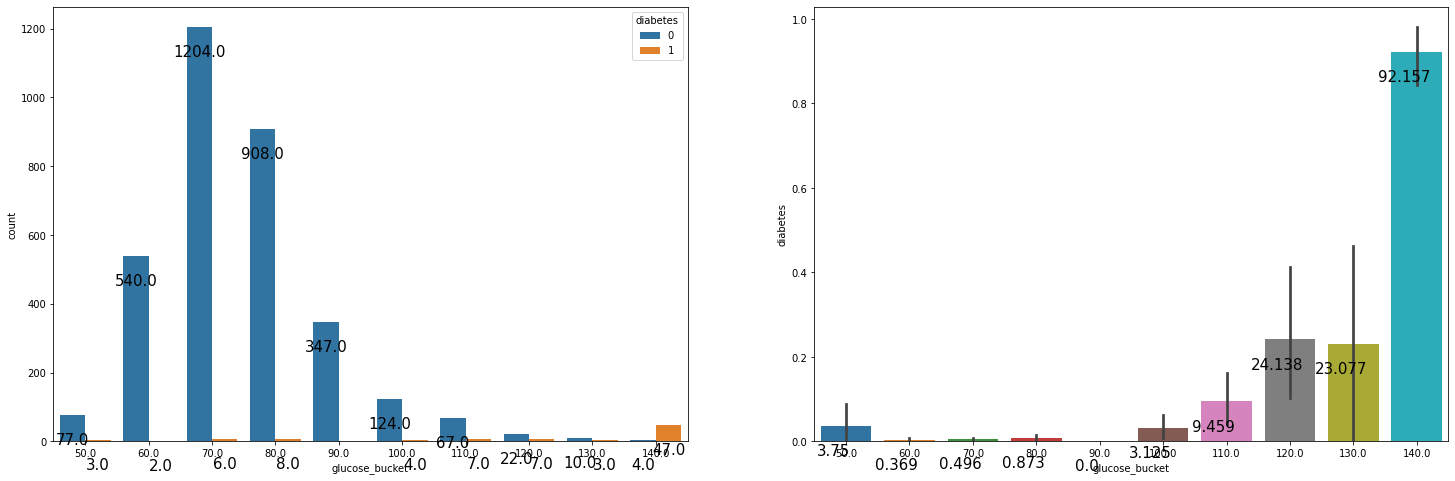

In [53]:
for v in ['sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
  fig, axes = plt.subplots(1,2,figsize=(25,8))
  ch=sns.countplot(x='glucose_bucket',hue=v,data=data_df, ax=axes[0])
  for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
  vh=sns.barplot('glucose_bucket',v, data = data_df, ax=axes[1])
  for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

In [54]:
cat_features = ['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
num_features = ['age', 'totChol', 'cigsPerDay', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

In [55]:
data_df=data_df.drop(columns=['cigsPerDay','glucose','heartRate','BMI','sysBP','diaBP','totChol','age'])

In [56]:
data_df=data_df.apply(pd.to_numeric)

In [57]:
import scipy.stats as ss
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

def cat_dependency_matrix(cols):
  cat_matrix = np.zeros((cols.shape[0], cols.shape[0]))
  for i,col1 in enumerate(cols):
    for j,col2 in enumerate(cols):
      if i != j:
        cat_matrix[i,j] = cramers_v(data_df[col1], data_df[col2])
      else:
        cat_matrix[i,j] = 1.
  return pd.DataFrame(cat_matrix, columns=cat_cols, index=cat_cols)

In [58]:
cat_cols = np.array(['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes','TenYearCHD'])

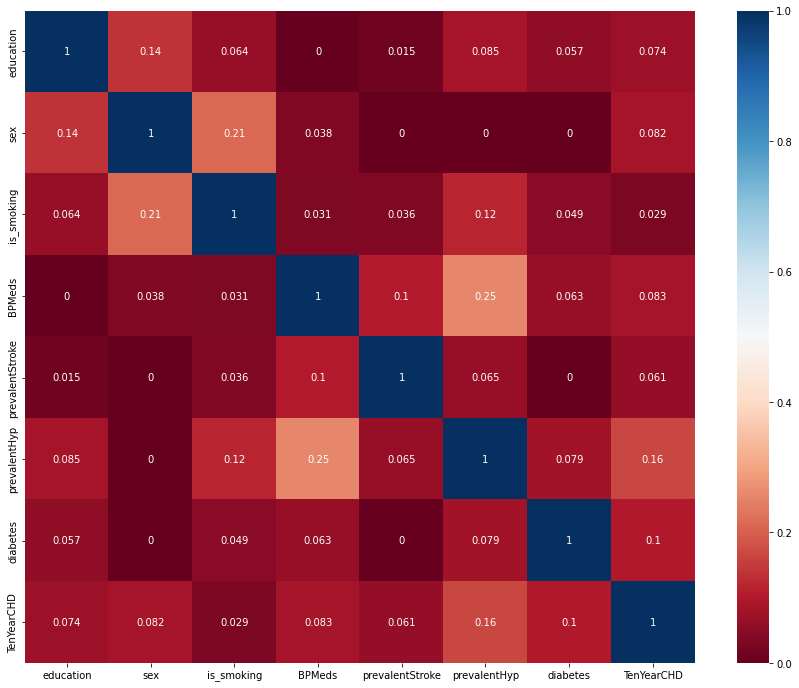

In [59]:
plt.figure(figsize = (15,12))
sns.heatmap(cat_dependency_matrix(cat_cols), cmap='RdBu', annot=True)

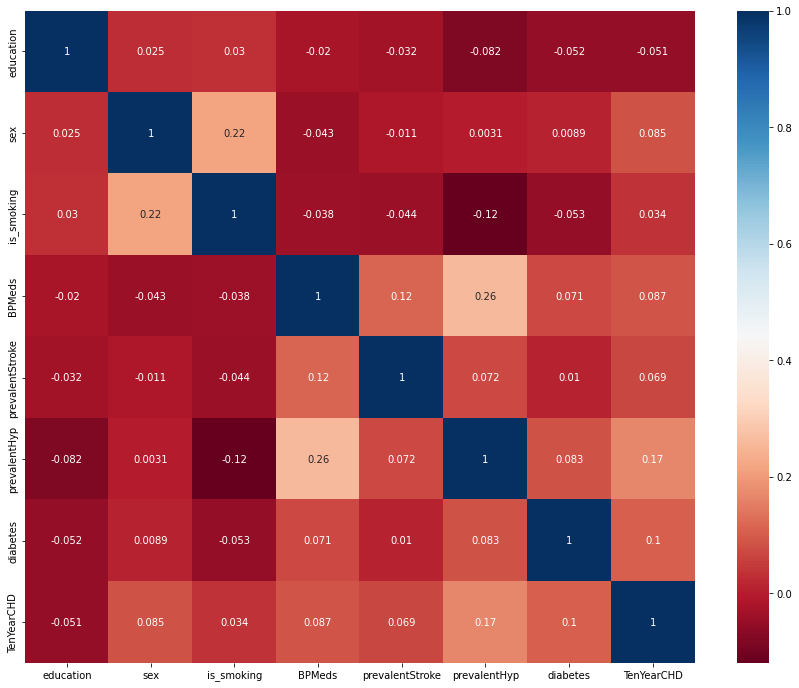

In [60]:
plt.figure(figsize = (15,12))
sns.heatmap(data_df[cat_cols].apply(pd.to_numeric).corr(), cmap='RdBu', annot=True)

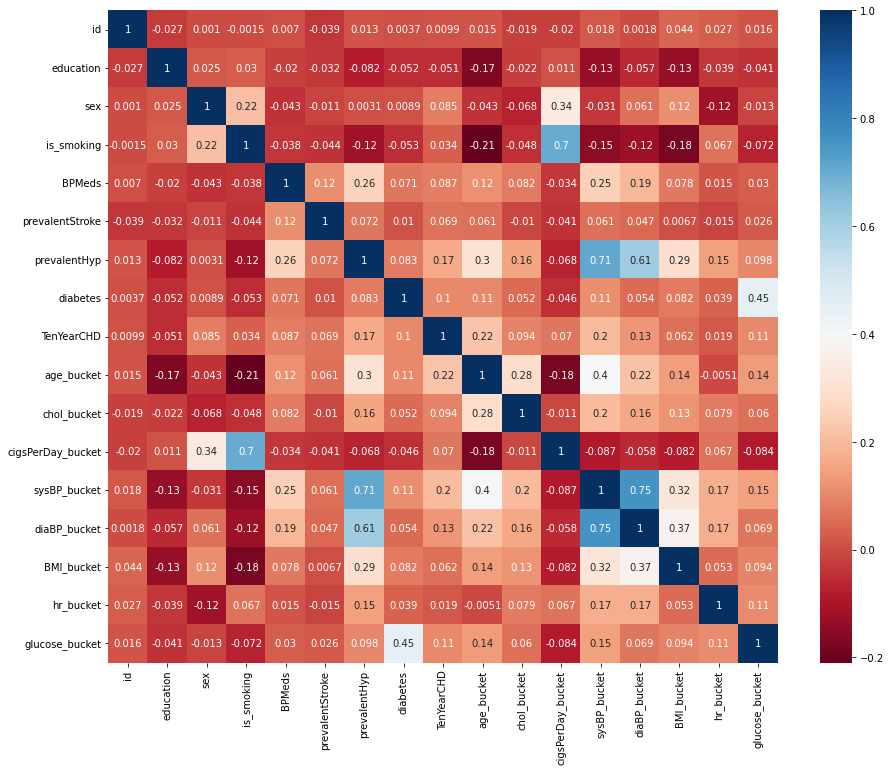

In [61]:
plt.figure(figsize = (15,12))
sns.heatmap(data_df.apply(pd.to_numeric).corr(), cmap='RdBu', annot=True)

In [62]:
data_df['PP']=abs(data_df['sysBP_bucket']-data_df['diaBP_bucket'])
data_df=data_df.drop(columns=['is_smoking','diaBP_bucket','sysBP_bucket','id'])

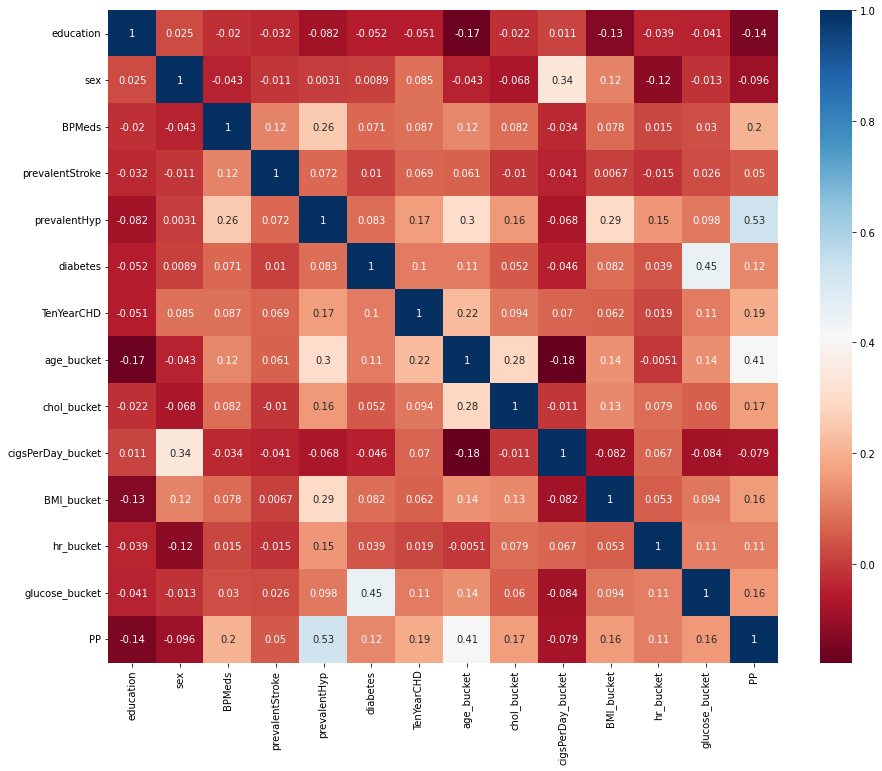

In [63]:
plt.figure(figsize = (15,12))
sns.heatmap(data_df.apply(pd.to_numeric).corr(), cmap='RdBu', annot=True)

In [64]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [65]:
ignore_features = ['TenYearCHD','prevalentHyp','prevalentStroke','diabetes','BPMeds','sex']
temp_df = data_df[[col for col in data_df.columns if col not in ignore_features]]
calc_vif(temp_df)

,variables,VIF
0,education,4.405780
1,age_bucket,36.888968
2,chol_bucket,28.869810
3,cigsPerDay_bucket,1.516526
4,BMI_bucket,36.011153
5,hr_bucket,33.031075
6,glucose_bucket,25.327953
7,PP,15.221975


In [66]:
data_df_copy=data_df.drop(columns=[])

In [67]:
X = data_df_copy.drop(columns=['TenYearCHD'], axis=1)
y = data_df_copy['TenYearCHD']

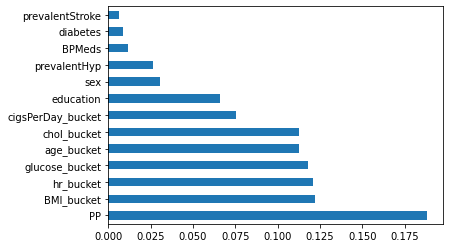

In [68]:
from sklearn.ensemble import ExtraTreesClassifier
model=RandomForestClassifier()
model.fit(X,y)
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(13).plot(kind='barh')
plt.show()

In [69]:
# Importing SMOTE
from imblearn.over_sampling import SMOTE
# Using SMOTE to oversample
X,y =SMOTE().fit_resample(X,y)

In [70]:
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(X,y)
mutual_data=pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=False)

PP                   0.360879
BMI_bucket           0.324493
age_bucket           0.297417
hr_bucket            0.253014
education            0.242266
glucose_bucket       0.200867
cigsPerDay_bucket    0.149197
BPMeds               0.039520
chol_bucket          0.029969
diabetes             0.010133
prevalentHyp         0.003567
sex                  0.000000
prevalentStroke      0.000000
dtype: float64

In [71]:
X=X.drop(columns=['prevalentHyp','prevalentStroke','diabetes','BPMeds','sex'])

In [72]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4318, 8)
(1440, 8)
(4318,)
(1440,)


In [73]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

# Model

## **Libraries required for Model**

In [74]:
# Importing libraries for modelling and evaluation
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

**Train and Test data sets**

In [75]:
# Importing packages to split data into train and test
from sklearn.model_selection import train_test_split

In [76]:
# Train Test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

In [77]:
# Creating a dictionary for models
models = {'Decision Tree Classifier' : DecisionTreeClassifier(random_state=42),
          'Logistic Regression' : LogisticRegression(random_state=42),
          'KNN' : KNeighborsClassifier(),
          'SVC' : SVC(probability=True),
          'XGB Classifier' : XGBClassifier(random_state=42),
          'Random Forest' : RandomForestClassifier(random_state=42)}

In [173]:
# Creating a function for model building
def model_build(X_train, y_train, X_test, y_test, model_dict,x):
  ''' Returns a dataframe with model name and accuracy scores, train confusion matrix, test confusion matrix and the values 
  for the roc curve '''
  
  # Creating a dataframe
  model_df = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision',
                                     'Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC'])
  
  # Creating necessary dictionaries
  train_confusion_matrix = {}  
  test_confusion_matrix = {}  
  curve = {}
  
  
  # Model building
  for n, m in model_dict.items():

    if x=='tunning':
      model = m
      model.fit(X_train, y_train)
      print(model.best_estimator_)
      model_best=model.best_estimator_
    else:
      model_best = m
      model_best.fit(X_train, y_train)

    train_preds = model_best.predict(X_train)
    test_preds = model_best.predict(X_test)

    test_probs = model_best.predict_proba(X_test)
    test_probs = test_probs[:,1]

    # Evaluation
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)
    train_precision = precision_score(y_train, train_preds)
    test_precision = precision_score(y_test, test_preds)
    train_recall = recall_score(y_train, train_preds)
    test_recall = recall_score(y_test, test_preds)
    train_roc_auc = roc_auc_score(y_train, train_preds)
    test_roc_auc = roc_auc_score(y_test, test_preds)
    train_f1_score=f1_score(y_train, train_preds)
    test_f1_score=f1_score(y_test, test_preds)

    # Updating the dataframe for each iteration
    model_df = model_df.append({'Model': n,
                               'Train Accuracy' : train_accuracy,
                               'Test Accuracy': test_accuracy,
                               'Train Precision' : train_precision,
                               'Test Precision' : test_precision,
                               'Train Recall' : train_recall,
                               'Test Recall' : test_recall,
                               'Train ROC AUC' : train_roc_auc,
                               'Test ROC AUC' : test_roc_auc,
                                'Train F1 ' : train_f1_score,
                                'Test F1 ' : test_f1_score
                                },
                               ignore_index = True)
    
    # Updating the dictionary for each iteration
    train_confusion_matrix[n] = confusion_matrix(y_train, train_preds)
    test_confusion_matrix[n] = confusion_matrix(y_test, test_preds)

    # ROC Curve values
    fpr, tpr, _ = roc_curve(y_test, test_probs)
    curve[n] = (fpr,tpr)

    

  return model_df, train_confusion_matrix, test_confusion_matrix, curve

In [79]:
# Using the model function to understand the scores of different models
model_table, train_cm, test_cm, curve= model_build(X_train, y_train, X_test, y_test, models,'Na')

In [80]:
# Models and their scores
model_table

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train ROC AUC,Test ROC AUC
0,Decision Tree Classifier,0.999768,0.829861,1.000000,0.812842,0.999540,0.846373,0.999770,0.830242
1,Logistic Regression,0.658407,0.654167,0.663556,0.640990,0.653493,0.662873,0.658446,0.654368
2,KNN,0.855952,0.776389,0.789493,0.703308,0.973805,0.937411,0.855016,0.780103
3,SVC,0.660723,0.663889,0.652248,0.637046,0.699908,0.724040,0.660412,0.665276
4,XGB Classifier,0.915702,0.899306,0.972367,0.958882,0.857077,0.829303,0.916167,0.897691
5,Random Forest,0.999768,0.899306,1.000000,0.927914,0.999540,0.860597,0.999770,0.898413


Model : Decision Tree Classifier


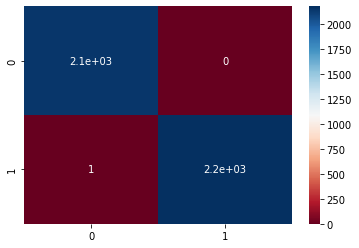

Model : Logistic Regression


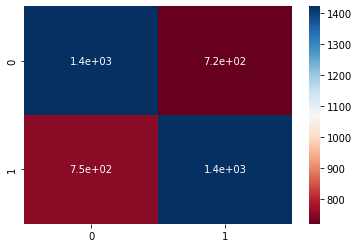

Model : KNN


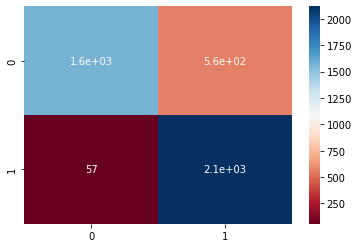

Model : SVC


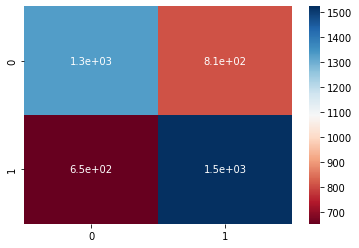

Model : XGB Classifier


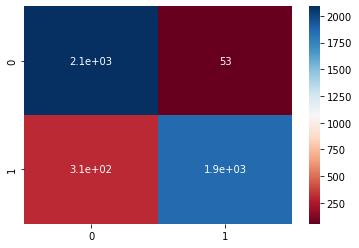

Model : Random Forest


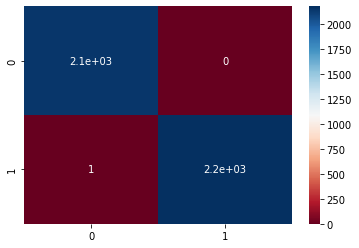

In [81]:
# Train confusion matrix
for name, matrix in train_cm.items():
  print(f'Model : {name}')
  sns.heatmap(matrix, cmap='RdBu', annot=True)
  plt.show()

Model : Decision Tree Classifier


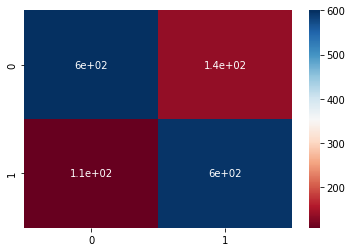

Model : Logistic Regression


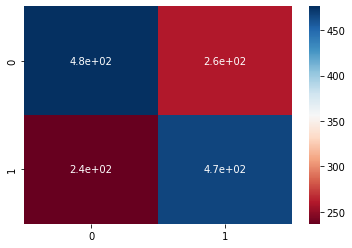

Model : KNN


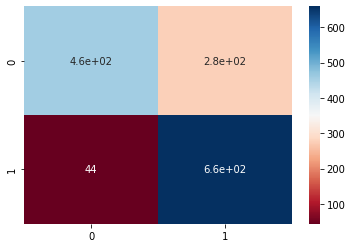

Model : SVC


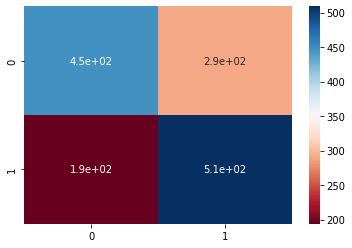

Model : XGB Classifier


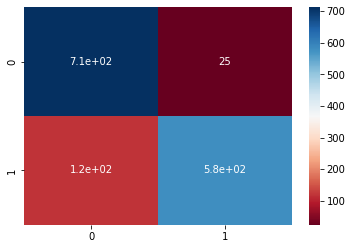

Model : Random Forest


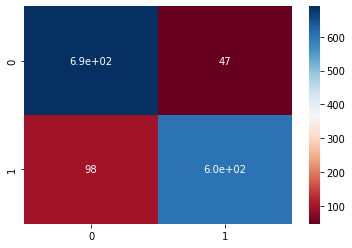

In [82]:
# Test confusion matrix
for name, matrix in test_cm.items():
  print(f'Model : {name}')
  sns.heatmap(matrix, cmap='RdBu', annot=True)
  plt.show()
 


Text(0.5, 1.0, 'ROC CURVE')

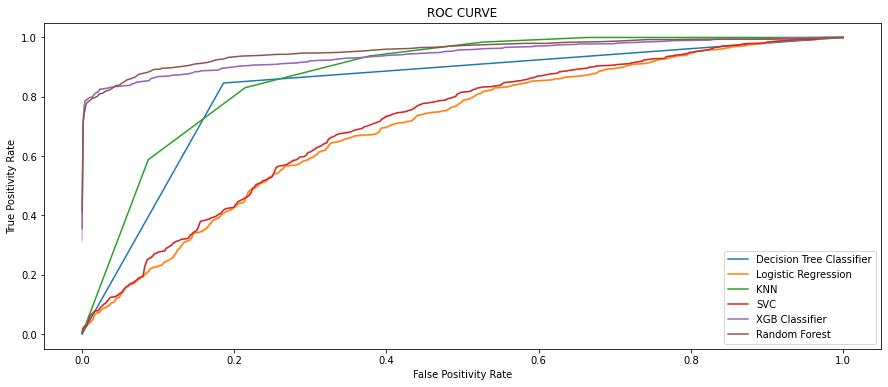

In [83]:
# Plotting ROC Curve for all the models
plt.figure(figsize=(15,6))
for name, value in curve.items():
  sns.lineplot(x = value[0], y = value[1], label = name)
plt.xlabel('False Positivity Rate')
plt.ylabel('True Positivity Rate')
plt.title('ROC CURVE')

# **Hyperparameter Tuning**

In [84]:
# Importing libraries for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
param_xgb = {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
              'gamma': np.arange(0.0,40.0,0.005)}
params_rf = { 'criterion': ['entropy', 'gini'],
               'max_depth': range(250),
               'n_estimators': range(150)}

In [ ]:
models = {'Decision Tree Classifier tunned' : GridSearchCV(DecisionTreeClassifier(),param_grid=params_dtc,scoring='recall',cv=5),
          'Logistic Regression tunned' : GridSearchCV(LogisticRegression(),param_grid=params_lg,,cv=5),
          'KNN tunned' : GridSearchCV(KNeighborsClassifier(),param_grid=params_knn,cv=5),
          'SVC tunned' : GridSearchCV(SVC(probability=True),param_grid=params_svc,cv=5),
          'XGB Classifier tunned' : RandomizedSearchCV(XGBClassifier(random_state=42), param_grid,  n_iter = 100,verbose= 2, 
                                                          scoring="accuracy", cv=5)
          'Random Classifier tunned' : RandomizedSearchCV(RandomForestClassifier(random_state=42),
                                                          param_distributions=params_rf, 
                                                          n_iter = 50,
                                                          cv = 5, 
                                                          verbose= 5, 
                                                          random_state=42,
                                                          n_jobs = -1)}

In [ ]:
params_xgb = {
  'max_depth' : range(3,11),
  'gamma' : [0.01, 0.05, 0.1, 0.5, 1.]
}

params_lg = {'C' : [0.001, 0.01, 0.1, 1., 10., 100., 1.e+3]}
params_knn = {
    'n_neighbors' : range(3,10,1),
    'weights' : ['uniform', 'distance']
    }
params_svc = {'C' : [0.001, 0.01, 0.1, 1., 10., 100., 1.e+3]}

params_dtc = {'criterion':['gini','entropy'],'max_depth':[200]}

In [226]:
models = {'SVC tunned' : RandomizedSearchCV(SVC(probability=True),
                        param_distributions={'kernel' : ['linear', 'rbf', 'poly'],
                                             "gamma": [0.1, 1, 10, 100], 
                                             "C": [0.1, 1, 10, 100, 1000],
                                             'degree':[0, 1, 2, 3, 4, 5, 6]}, 
                        n_iter = 10,
                        cv = 5, 
                        verbose= 5, 
                        random_state=42,
                        n_jobs = -1)}

In [227]:
model_table, train_cm, test_cm, curve= model_build(X_train, y_train, X_test, y_test, models,'tunning')

Fitting 5 folds for each of 3 candidates, totalling 15 fits


KeyboardInterrupt: ignored

In [220]:
model_table

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train ROC AUC,Test ROC AUC,Test F1,Train F1
0,SVC tunned,0.996526,0.894444,0.993604,0.882108,0.99954,0.904694,0.996502,0.894681,0.893258,0.996564


In [215]:
from scipy.stats import reciprocal, uniform


TypeError: ignored

In [ ]:
# Importing SHAP
import shap

In [ ]:
!pip install shap

     |████████████████████████████████| 564 kB 5.0 MB/s 


In [ ]:
# As X_test is an array without column names we will build a dataframe
shap_df = pd.DataFrame(X_test, columns = X.columns)

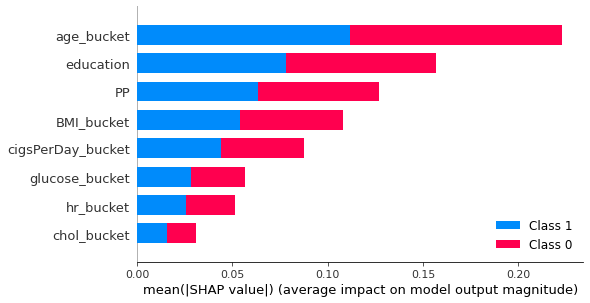

In [ ]:
# SHAP Summary Plot
shap.summary_plot(shap_values, shap_df, plot_type = 'bar')






   ## **Conclusion :**

Models accuracy of predicting the patient's risk of developing Coronary Heart Disease **(CHD)** in the next **10 years.**

As conclusion to the project, I would like to summarize the process and some details of the project.

The data was cleaned, an EDA was performed, transformation of data was done in order to ensure it fits well into machine learning models, modelling along with evaluation of the models was done and finally hyperparameter tuning was done in an attempt to imporve the model.

6 models were used in the project, namely, Decision Tree, Logistic Regression, Random Forest, XGB Classifier, KNN and SVM. Random Forest was best performing base model. Hyperparameter tuning was done on the same model.

The final results of the model are almost close to the base model and we have acheived almost 90% test accuracy and test precision, where as we have acheived almost 88% test recall.

Using SHAP we identified the feature importances and identified that, gender, age and education were 3 main influencers.

Other methods or models could be used to further improve the model. With the help of a medical expert we could engineer more features which would in turn help improve the model further.